<center><span style="font-size:40px;"><b>INFORMATION THEORY</b></span></center>

Information Theory, founded by Claude E. Shannon in 1948, provides a mathematical framework to quantify information and measure uncertainty.
It lies at the intersection of statistics, probability, computer science, and signal processing, and serves as the theoretical backbone of many modern technologies — from data compression to machine learning.

> **In short:**  
> Information theory provides the quantitative tools to reason about uncertainty, randomness, and the limits of efficient communication.

In [1]:
from IPython.display import Image, display

---

---

---

# 1 - INFORMATION AND ENTROPY

## INTRO - PROBABILITY SPACE

A probability space is a triple:

$$
S = (\Omega, \mathcal{F}, P)
$$

where:

- **$\Omega$** (*sample space*) is the **set of all possible outcomes**.  
- **$\mathcal{F}$** (*σ-algebra*) is a collection of subsets of $\Omega$, called **events**, such that:
  - $\mathcal{F} \subseteq \mathcal{P}(\Omega)$ (the power set of $\Omega$)
  - $\mathcal{F}$ is closed under the operations of:
    - Union: if $A, B \in \mathcal{F}$, then $A \cup B \in \mathcal{F}$
    - Intersection: if $A, B \in \mathcal{F}$, then $A \cap B \in \mathcal{F}$
    - Complement: if $A \in \mathcal{F}$, then $A^c \in \mathcal{F}$
- **$P$** (**probability measure**) is a function $P: \mathcal{F} \to [0, 1] \subset \mathbb{R}$ such that:
  1. $P(\Omega) = 1$  
  2. For any countable set of disjoint events $\{E_i\}_{i \in I}$, $E_i \cap E_j = \emptyset$ for $i \ne j$,
     $ P\left(\bigcup_{i \in I} E_i\right) = \sum_{i \in I} P(E_i) $

#### EXAMPLE: TWO FAIR COINS

Let us consider the experiment of tossing two independent, fair coins. We codify *h* for heads and *t* for tails. So *ht* means the first toss is head and the second tails.

- Sample space: $ \Omega = \{hh, ht, th, tt\} $
- Set of events: Each event is a subset of $\Omega$, i.e., a collection of one or more outcomes. An example is the power set of $\Omega$. That is, the set of all possible subsets of $\Omega$, given by:
$$
\begin{aligned}
\mathcal{F} = \{ &\emptyset, \{hh\}, \{ht\}, \{th\}, \{tt\}, \\
&\{hh, ht\}, \{hh, th\}, \{hh, tt\}, \{ht, th\}, \{ht, tt\}, \{th, tt\}, \\
&\{hh, ht, th\}, \{hh, ht, tt\}, \{hh, th, tt\}, \{ht, th, tt\}, \Omega \}
\end{aligned}
$$

- Probability measure: Since the coins are fair and independent, each outcome is equally likely: $ P(\{x\}) = \frac{1}{4}, \forall x \in \Omega $. Thus, for any event $E \subseteq \Omega$: $ P(E) = \frac{|E|}{4} $.
  
  For example, let $E$ = “the first toss is heads.” Then: $ E = \{hh, ht\} $ and $ P(E) = \frac{2}{4} = 0.5 $.

> **In summary:**  
> A probability space formalizes the intuitive idea of randomness by defining what the possible outcomes are ($\Omega$), which collections of outcomes we can assign probabilities to ($\mathcal{F}$), and how those probabilities behave ($P$).


---

## 1.1 - INFORMATION

Intuitively, **information measures the amount of uncertainty reduced when an event is observed.**  
If an event is very likely, learning its outcome provides little new information. Conversely, if it is rare or surprising, it carries more information.

The **self-information** (or **surprisal**) of an event $x$ with probability $p(x)$ is defined as:

$$
I(x) = -\log_2 p(x)
$$

The logarithm base is arbitrary, but for convention we use base 2. In this way the *unit of measure* for information are the *bits*.

NOTE: even then there is a minus in the formula, information assume always positive values because that minus balances the logarithm which is always negative (due to the fact that its argument $p$ has values $[0,1]$).

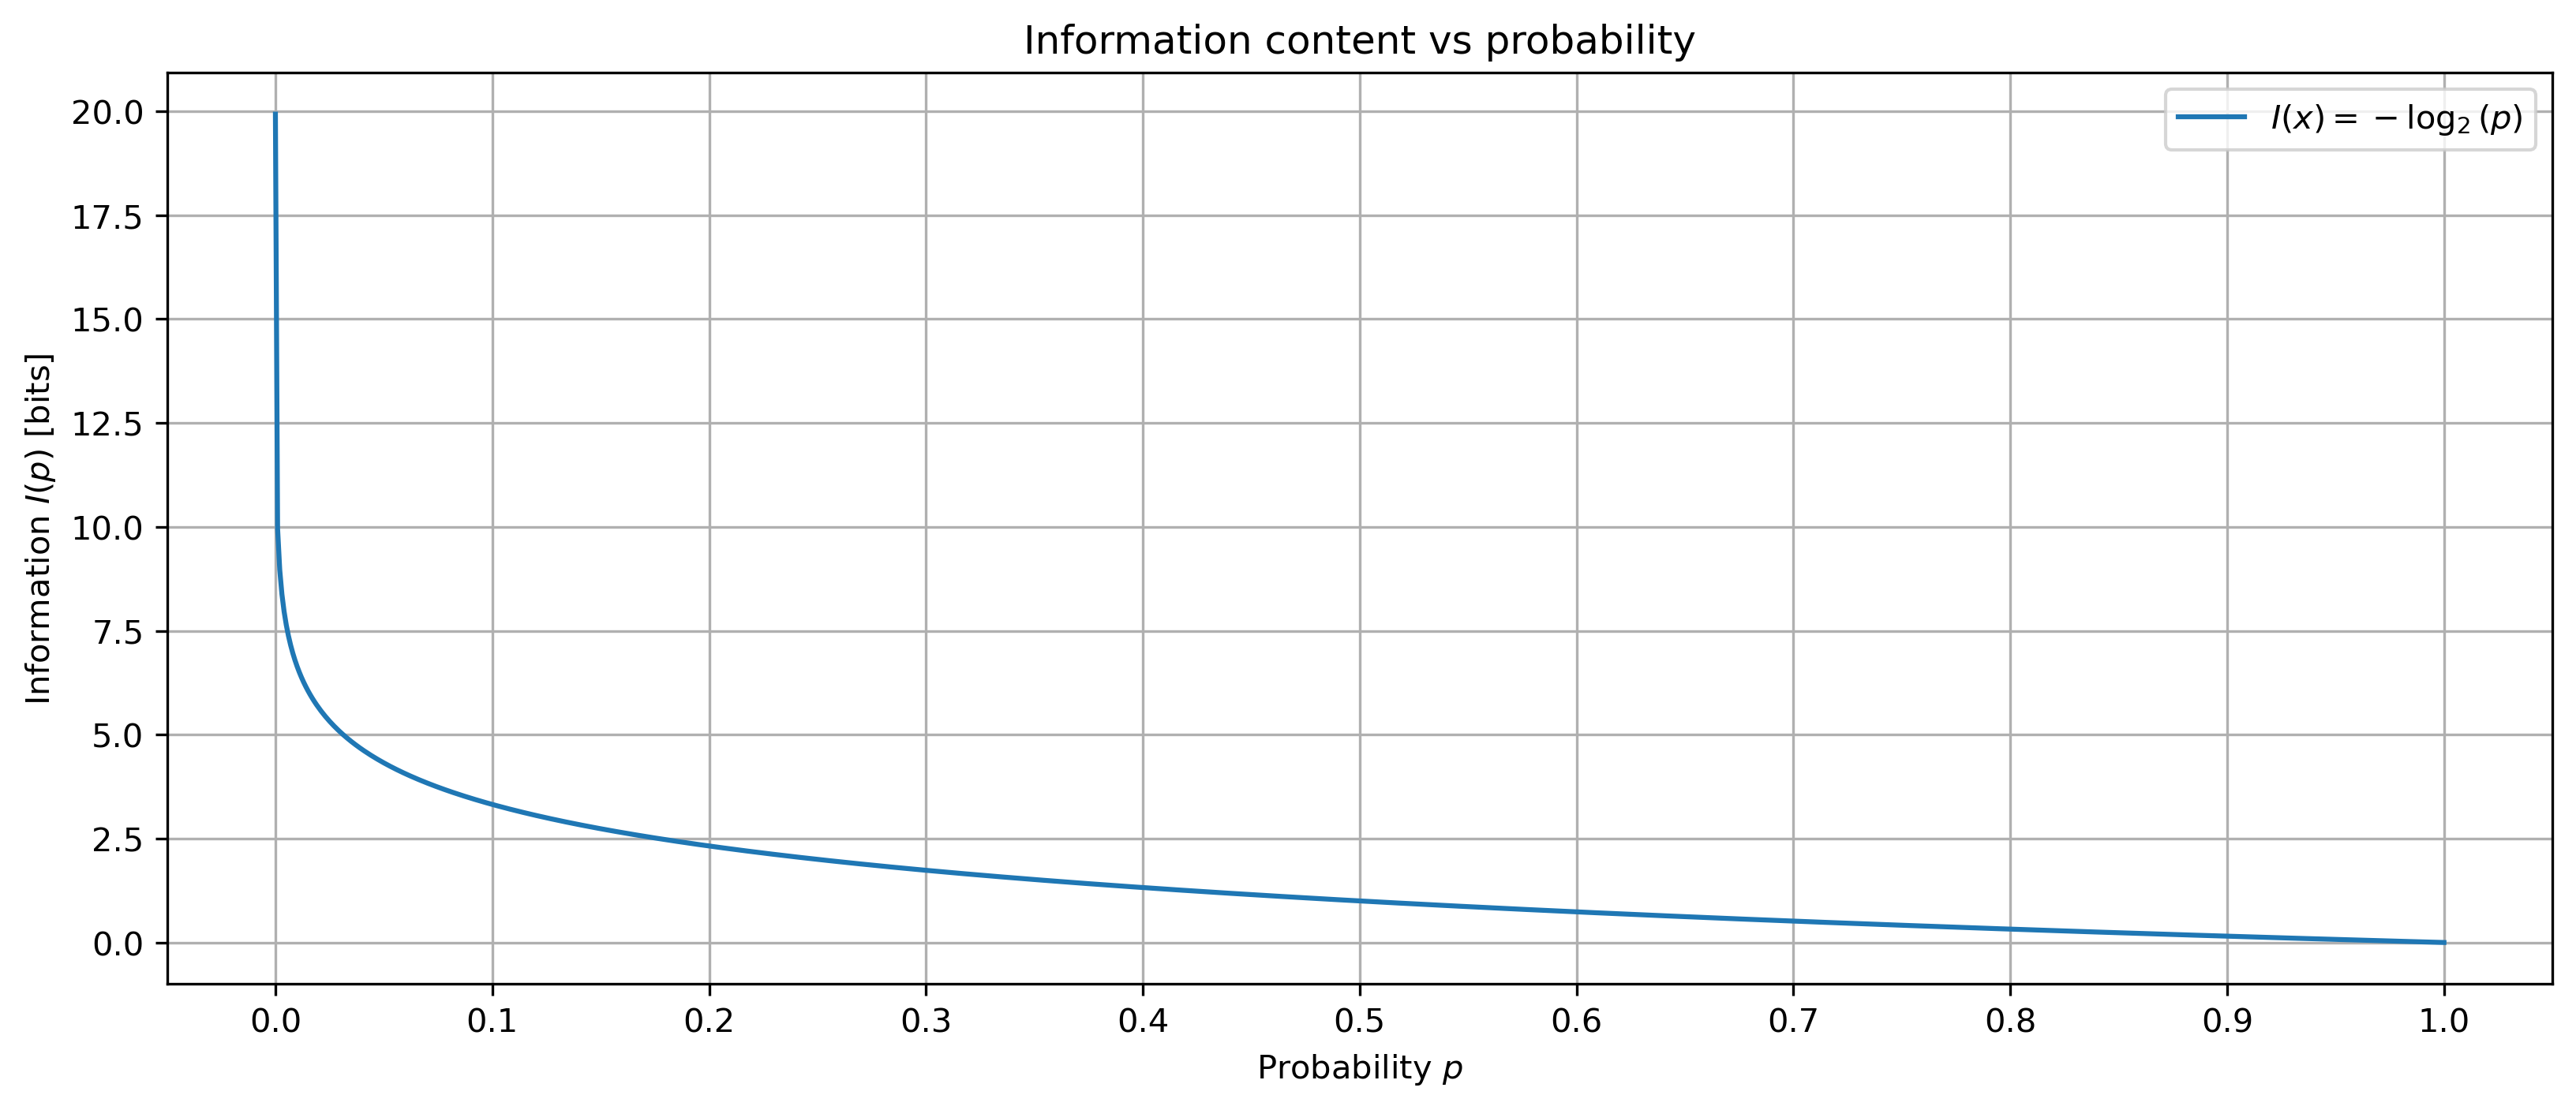

In [15]:
display(Image("./images/IT_information_function.png", width=1000))

### 1.1.1 BITS

The bit (short for binary digit) is the fundamental unit of information.  
It **represents the amount of information gained when we learn the outcome of an event that has two equally likely possibilities**.

A single bit answers a *yes/no* question with equal uncertainty:
- Before knowing the answer, uncertainty = 1 bit.  
- After observing the answer, uncertainty = 0 bits (we know the outcome).

For example, by tossing a fair coin we have two outcomes (*Heads* or *Tails*) with equal probability $p = 0.5$. The information gained when we observe the result 1 bit, as we can see:

$$
I(x) = -\log_2 p(x) = -\log_2(0.5) = 1 \text{ bit}
$$

Instead if I have a non fair coin with probabilities $p_H = 0.9$ and $p_T = 0.1$, the information gained after seeing the outcome would be:

$$
I_H(x) = -\log_2(0.9) = 0.15 \text{ bits}
$$
$$
I_T(x) = -\log_2(0.1) = 3.32 \text{ bit}
$$

As we can see the information gained by a likely outcome ( seeing head with $p_H = 0.9$) is very low. We are not surprised by this outcome, it's nothing really new.  
Instead the information gained by a not-likely outcome ( seeing tail with $p_T = 0.1$) is very high. We are really surprised by this outcome, it's something unexpetced.

---

## 1.2 - ENTROPY

### 1.2.1 SHANNON ENTROPY

The concept of Shannon Entropy (or simply Entropy) formalizes the idea of *average information content* or *average uncertainty* of a random variable $X$.  
**It tells us how much information we expect to gain on average by learning the outcome of $X$**.  
Another interpretation: it tells us on average how many bits are needed to describe or encode the outcome of a random variable drawn from a given probability distribution. **Also the average number of yes/no questions that are needed to fully identify the outcome.**

Given a discrete random variable $X$ with possible outcomes $x_1, x_2, \dots, x_n$ and probability mass function $p(x)$, the Shannon entropy is defined as:

$$
H(X) = -\sum_{x} p(x) \log_2 p(x)
$$

Higher entropy → more uncertainty → harder to predict → longer average code. If all outcomes are equally likely, entropy is maximal.  
Lower entropy → more predictable → shorter average code. If one outcome is certain, entropy is zero (no uncertainty → no information gained).

Equivalently, we can define entropy as the *expected value* (mean) of Information: $ H(X) = \mathbb{E}[I(X)] = \sum_x p(x) I(x) $

Note that the Shanno Entropy refers to the whole probability space $S=(\Omega, \mathcal{F}, P)$.

> **Intuitively:**  
> Entropy is lowest when the outcome is fully predictable,  
> and highest when all outcomes are equally uncertain.

#### PROPERTIES
Let $X \in \mathcal{A}_X$ be a random variable taking $N = |\mathcal{A}_X|$ possible outcomes. Then the entropy satisfies this constraints:
$$
0 \le H[X] \le \log N
$$

Minimum entropy $H[X] = 0$ is reached only when exists $i$ such that $p_i = 1$. This means that all uncertainty is gone: one outcome has probability 1, all others 0.

Maximum entropy $H[X] = \log N$ is reached only when all outcomes has equal probability $p_X(i) = \frac{1}{N}$. This means that all outcomes are equally likely, giving the highest possible uncertainty.

#### EXAMPLE: COIN

Let $X$ be the outcome of a fair coin toss: $p(\text{H}) = p(\text{T}) = 0.5$. Then:

$$
H(X) = -[0.5 \log_2 0.5 + 0.5 \log_2 0.5] = 0.5 \cdot 1 + 0.5 \cdot 1 = 1 \text{ bit}
$$

So we need, on average, 1 bit to represent the outcome — perfectly matching our intuition that one yes/no question resolves the uncertainty.

Let $X$ be the outcome of a non-fair coin toss: $p(\text{H}) = 0.9$, $p(\text{T}) = 0.1$. Then:

$$
H(X) = -[0.9 \log_2 0.9 + 0.1 \log_2 0.1] = 0.9 \cdot 0.15 + 0.1 \cdot 3.32 \approx 0.47 \text{ bits}
$$

Here the outcome is more predictable, so less information (fewer bits) is needed to describe it.

### 1.2.2 JOINT ENTROPY

Let's take two random variables $X$ and $Y$ taking values $\{x_i\}$ and $\{y_j\}$ with probabilty distributions $p_i := p_X(x_i)$ and $q_j := p_Y(y_j)$.  
**The joint entropy of two discrete random variables $X$ and $Y$ measures the total uncertainty about their combined outcomes**, and can be define as the Shannon entropy of the joint distribution $p_{X,Y}(x, y)$.
Defining $p_{ij} := p_{X,Y}(x_i, y_j)$, the joint entropy is:

$$
H[X, Y] = - \sum_{i,j} p_{ij} \log p_{ij}
$$

The quantity $H(X, Y)$ represents the average number of bits needed to describe the outcome of the pair $(X, Y)$.

If $X$ and $Y$ are independent, then $p(x, y) = p(x)p(y)$ and the joint entropy simplifies to:
$$
H(X, Y) = H(X) + H(Y)
$$

#### EXAMPLE: TWO CORRELATED COIN TOSSES

Let $X$ and $Y$ represent the outcomes of two non-fair coin tosses. Suppose $Y$ always takes the same value as $X$ — that is, $Y = X$.  
Each variable can take values $\{H, T\}$, and $p_X(H) = p_X(T) = 1/2$.

The joint distribution is then:

| X \ Y | H   | T   |
|-------|-----|-----|
| H     | 1/2 | 0   |
| T     | 0   | 1/2 |

The joint entropy is

$$
\begin{aligned}
H[X, Y] &= - \sum_{i,j} p_{ij} \log p_{ij} \\
&= - \left[ \frac{1}{2} \log \frac{1}{2} + \frac{1}{2} \log \frac{1}{2} \right] = 1 \text{ bit.}
\end{aligned}
$$

This result can be interpreted intuitively:

- If we know $X$, we automatically know $Y$, since they are perfectly correlated.  
- Therefore, the total uncertainty about the pair $(X, Y)$ is the same as the uncertainty about $X$ alone.

Indeed, in this case:

$$
H[X, Y] = H[X] = 1 \text{ bit, and } H[Y|X] = 0,
$$

meaning that once $X$ is known, there is no residual uncertainty about $Y$.  
This contrasts with the independent case, where $H[X, Y] = 2$ bits.


### 1.2.3 CONDITIONAL ENTROPY
**The conditional entropy of $Y$ given $X$ measures the remaining uncertainty about $Y$ once $X$ is known.**  
If we observe $X = x_i$, then $Y$ takes values $y_j$ with conditional probabilities

$$
p_{j|i} = \frac{p_{ij}}{p_i}
$$

and the **conditional entropy of $Y$ given $X = x_i$** is: 
$$ 
H[Y|x_i] = - \sum_j \frac{p_{ij}}{p_i} \log \frac{p_{ij}}{p_i} 
$$

Averaging over all possible values of $X$ gives the **conditional entropy of $Y$ given $X$**:

$$
H[Y|X] = \sum_i p_i H[Y|x_i] = - \sum_{i,j} p_{ij} \log \frac{p_{ij}}{p_i}
$$

The conditional entropy quantifies how much information we still need, on average, to describe $Y$ after knowing $X$.  
If $Y$ is completely determined by $X$, then $H(Y|X) = 0$.  
If $Y$ and $X$ are independent, then $H(Y|X) = H(Y)$, since knowing $X$ gives no information about $Y$.

The conditional entropy can also be expressed in terms of a KL divergence:
$$
H[Y|X] = \log N - D_{KL}(p_{ij} \,||\, p_i \otimes u_j)
$$

where $u_j$ is the uniform distribution over the possible values of $Y$.

#### EXAMPLE: TWO COIN TOSSES WITH BIASED DEPENDECY

Let $X$ and $Y$ be two random variables representing two coin tosses, but with a biased dependency.  
Suppose the first coin ($X$) is fair: $p_X(H) = p_X(T) = \frac{1}{2}$, and the second coin ($Y$) tends to take the same value as $X$ with probability $0.8$, and the opposite value with probability $0.2$:

| X \ Y | H   | T   |
|-------|-----|-----|
| H     | 0.4 | 0.1 |
| T     | 0.1 | 0.4 |

The joint probabilities sum to 1, and the marginal of $X$ is $p(H) = p(T) = 1/2$, as expected.

*Step 1. Compute the conditional probabilities*:

For $X = H$:
$$
p(Y = H | X = H) = \frac{p(Y = H , X = H)}{p(X = H)} = \frac{0.4}{0.5} = 0.8, \quad p(Y = T | X = H) = 0.2
$$

For $X = T$:
$$
p(Y = H | X = T) = 0.2, \quad p(Y = T | X = T) = 0.8
$$

*Step 2. Compute the conditional entropy of Y given X*:

For $X = H$ (and similarly for $X = T$):

$$
H[Y|X = H] = - (0.8 \log 0.8 + 0.2 \log 0.2) \approx 0.72 \text{ bits}
$$

Since both cases are symmetric, we have:

$$
H[Y|X] = 0.5 \times 0.72 + 0.5 \times 0.72 = 0.72 \text{ bits.}
$$

*Interpretation*:
- The uncertainty about $Y$ **after** knowing $X$ is smaller than $H[Y] = 1$ bit (which it would be if $Y$ were independent).
- The conditional entropy $H[Y|X] = 0.72$ bits reflects that $Y$ is partially predictable from $X$, but not fully determined.
- In the two extreme cases:
  - If $Y = X$ always, then $H[Y|X] = 0$ (no uncertainty remains).
  - If $Y$ is independent from $X$, then $H[Y|X] = H[Y] = 1$ bit.

Thus, the conditional entropy smoothly measures how much uncertainty remains about one variable when the other is known.

### 1.2.4 CHAIN RULE FOR ENTROPY

The joint and conditional entropies satisfy the relation:
$$
H[X, Y] = H[X] + H[Y|X]
$$

which means that the total uncertainty about $(X, Y)$ equals the uncertainty about $X$ plus the remaining uncertainty about $Y$ once $X$ is known.  
By symmetry, the same relation holds as:

$$
H[X, Y] = H[Y] + H[X|Y]
$$

This rule is directly analogous to the chain rule of probability:  
$$
p(x, y) = p(x)p(y|x)
$$  

In the probabilistic case, the joint probability is obtained through the product of the marginal and conditional probabilities.  
However, when we move to information theory, we work with logarithms of probabilities (since entropy involves terms like $-\log p(x)$).  
Because the logarithm turns products into sums the chain rule for entropy becomes additive.  

### 1.2.5 MUTUAL INFORMATION

**The mutual information between $X$ and $Y$ quantifies how much knowledge of one random variable reduces the uncertainty about the other.**

In other words, it measures the statistical dependence between the two variables: if $X$ and $Y$ are independent, knowing $X$ tells us nothing about $Y$, and the mutual information is zero. Otherwise it's always positive.

It is defined as  
$$
I[X : Y] = H[X] + H[Y] - H[X, Y] = H[Y] - H[Y|X] = H[X] - H[X|Y]
$$  

This shows that **mutual information can be seen as the reduction in entropy (uncertainty) of one variable due to the knowledge of the other.**  
Equivalently, it can be rewritten as  

$$
H[X] = H[X|Y] + I[X : Y], \qquad H[Y] = H[Y|X] + I[X : Y]
$$  

This decomposition means that the total uncertainty about $X$ (or $Y$) can be divided into two parts:  
- a conditional part representing what remains uncertain even after observing the other variable  
- and a shared part $I[X : Y]$, representing the amount of common information between them  

Mutual information can also be expressed as a Kullback–Leibler divergence (see paragraph below) between the joint distribution $p_{ij}$ and the product of the marginals $p_i q_j$:  

$$
I[X : Y] = D_{KL}(p_{ij} \,||\, p_i q_j) \ge 0
$$  

This interpretation highlights that $I[X : Y]$ measures the distance between the actual joint distribution and the one that would hold if $X$ and $Y$ were independent.  
Therefore, $I[X : Y] = 0$ if and only if $p_{ij} = p_i q_j$, meaning $X$ and $Y$ share no information at all.

#### RELATIONSHIP CAPTURED BY THE MUTUAL INFORMATION

Mutual information measures the total statistical dependency between two random variables, regardless of the form of their relationship.  
Unlike correlation, which captures only linear dependencies, mutual information can detect any kind of relationship, whether linear or non-linear.

For example:
- If $Y = 2X$, the relationship is linear, and both correlation and mutual information are high.  
- If $Y = X^2$, the relationship is non-linear: the correlation might be zero (for symmetric distributions), but the mutual information remains positive because $Y$ is still fully determined by $X$.  

This means that:
- $I[X : Y] = 0$ only if $X$ and $Y$ are statistically independent, meaning that the knowledge of one gives no information about the other.  
- A higher mutual information value indicates a stronger dependency, but it does not specify whether the relationship is linear, quadratic, or of any other type.  

#### EXAMPLE

Let us consider the two random variables $X$ and $Y$ from the previous example, representing two coin tosses with a dependency between them. 

We have:
| X \ Y | H   | T   |
|-------|-----|-----|
| H     | 0.4 | 0.1 |
| T     | 0.1 | 0.4 |

The marginals are:
$$
p_X(H) = p_X(T) = 0.5, \quad p_Y(H) = p_Y(T) = 0.5
$$

*Step 1. Compute the entropies*:

The marginal entropies are:

$$
H[X] = H[Y] = - (0.5 \log 0.5 + 0.5 \log 0.5) = 1 \text{ bit}
$$

The joint entropy is:

$$
H[X, Y] = - \sum_{i,j} p_{ij} \log p_{ij} = - (0.4 \log 0.4 + 0.1 \log 0.1 + 0.1 \log 0.1 + 0.4 \log 0.4) \approx 1.72 \text{ bits}
$$

*Step 2. Compute the mutual information*:

$$
I[X : Y] = H[X] + H[Y] - H[X, Y] = 1 + 1 - 1.72 = 0.28 \text{ bits}
$$

*Interpretation*:

- The mutual information $I[X : Y] = 0.28$ bits quantifies how much information knowing $X$ gives about $Y$ (and vice versa).  
- If the two variables were independent, we would have $H[X, Y] = H[X] + H[Y]$, and the mutual information would be zero.  
- If they were perfectly correlated (for example, $Y = X$), then $H[Y|X] = 0$, and $I[X : Y] = H[Y] = 1$ bit.  

Thus, $I[X : Y]$ acts as a measure of statistical dependence: it tells us how far the joint behavior of the variables is from what would be expected if they were independent.  

In this example, $I[X : Y] = 0.28$ bits means that there is a moderate dependency between the two coin tosses — knowing the first coin slightly reduces the uncertainty about the second.

---

## 1.3 CROSS ENTROPY AND K-L DIVERGENCE

### 1.3.1 CROSS ENTROPY

The **cross entropy measures how well a probability distribution $q = \{q_i\}$ approximates another true distribution $p = \{p_i\}$**.  
Here $p$ represents the true distribution of data — what actually happens — and $q$ represents the model or belief we are using to predict or describe it.
So $H[p,q]$ answers: “If the world follows $p$, but I use $q$ to encode or predict it, how many bits on average do I need?”
It quantifies the average number of bits needed to encode events from $p$ when using a code optimized for $q$.  
If $q = p$, the model perfectly matches the data and $H[p, q] = H[p]$. If $q$ differs from $p$, the cross entropy increases, indicating inefficiency in representing the true distribution.  

It is defined as:
$$
H[p, q] = - \sum_i p_i \log q_i
$$  

If $q = p$, the cross entropy reduces to the Shannon entropy.  
In general, the cross entropy can be expressed as:

$$
H[p, q] = H[p] + D_{KL}(p \,||\, q)
$$  

This shows that **it is always greater than or equal to the true entropy $H[p]$**, since the Kullback–Leibler divergence is non-negative.  
Intuitively, using the wrong model $q$ to represent the true data distribution $p$ introduces an extra cost in terms of information or coding length.  

From a probabilistic or machine learning viewpoint, minimizing the cross entropy corresponds to making the predicted distribution $q$ as close as possible to the true distribution $p$, which is why it is widely used as a loss function in classification problems.


#### EXAMPLE

Suppose we have a classification problem with three possible classes: *cat*, *dog*, and *bird*.  
The true distribution $p$ (the actual label) is one-hot encoded, for example this image truly is a cat.:
$$
p = [1, 0, 0]
$$  

Now suppose our model for that image believes it is a cat with 70% probability, a dog with 20%, and a bird with 10%:
$$
q = [0.7, 0.2, 0.1]
$$  

The cross entropy is:
$$
H[p, q] = - \sum_i p_i \log q_i = -1 \cdot \log 0.7 \approx 0.51 \text{ bits.}
$$  

If the model were more confident and predicted $q = [0.9, 0.05, 0.05]$, the cross entropy would be:
$$
H[p, q] = -\log 0.9 \approx 0.15,
$$
meaning fewer bits are required — the model’s predictions are more efficient and closer to the truth.

Conversely, if the model is wrong and predicts $q = [0.1, 0.7, 0.2]$, then:
$$
H[p, q] = -\log 0.1 = 1,
$$
which means we need more bits to describe the same outcome — the model is less aligned with reality.

This illustrates how cross entropy naturally measures how well our probabilistic model $q$ represents the true data distribution $p$, and why minimizing it improves prediction accuracy.

### 1.3.2 KULLBACK-LEIBLER DIVERGENCE

The Kullback–Leibler divergence, or relative entropy, **measures how different two probability distributions are.**  
Consider two random variables $X_1$ and $X_2$ defined over the same space $\{x_i\}$, with distributions $p_i = p_{X_1}(x_i)$ and $q_i = p_{X_2}(x_i)$. The KL divergence is defined as:

$$
D_{KL}[X_1 || X_2] = D_{KL}(p || q) = \sum_i p_i \log \frac{p_i}{q_i}
$$

The KL divergence satisfies Gibbs' inequality:

$$
D_{KL}(p || q) \ge 0
$$

with equality if and only if $p = q$. This means that $D_{KL}$ quantifies how distinguishable the two distributions are.  
**It can be seen as a "distance" between $p$ and $q$**, but it is not a true distance since it is not symmetric: $D_{KL}(p || q) \ne D_{KL}(q || p)$ in general.

Suppose that the true distribution of a random variable $X$ is $p$, but an observer mistakenly assumes that it follows $q$.  
When the outcome is $x_i$, the observer believes the information gained is $-\log q_i$. Averaging this over the true probabilities $p_i$, we obtain the **cross entropy**: $H(p, q) = -\sum_i p_i \log q_i$. This quantity is always larger than the true Shannon entropy $H(p) = -\sum_i p_i \log p_i$ because the observer’s wrong assumption makes them overestimate the information content.  
The difference between these two quantities is the KL divergence:
$$
D_{KL}(p || q) = H(p, q) - H(p) = \sum_i p_i (\log p_i - \log q_i)
$$

Thus, $D_{KL}(p || q)$ **measures the extra amount of information needed when using a model $q$ to describe data actually coming from $p$.** 
It is a key concept in information theory, statistics, and machine learning, especially in model evaluation and optimization.

#### CONNECTION WITH SHANNON ENTROPY
**The Shannon entropy can also be expressed in terms of the KL divergence from a uniform distribution**.  
If $u_i = 1/N$ represents the uniform probability, then:

$$
H(p) = \log N - D_{KL}(p || u)
$$

Hence, **entropy measures how close a distribution is to the uniform one**: the more uniform $p$ is, the larger its entropy.

#### EXAMPLE:

Consider a random variable $X \in \{x_1, x_2\}$ with true probabilities: $p_1 = \frac{3}{4}, p_2 = \frac{1}{4}$.  
And an observer assuming  $q_1 = \frac{1}{2},  q_2 = \frac{1}{2}$.  

The KL divergence is:
$$
D_{KL}(p || q) = \sum_i p_i \log \frac{p_i}{q_i} 
= \frac{3}{4} \log \frac{3/4}{1/2} + \frac{1}{4} \log \frac{1/4}{1/2} = 0.44 - 0.25 \approx 0.19
$$

The KL divergence $0.19$ quantifies the extra average information (in bits) that the observer would mistakenly think they obtain by using $q$ instead of the true $p$.  
This small value reflects that $q$ is not wildly different from $p$, but still incurs some inefficiency in encoding or prediction.

---

---

---

---

# 2 - INFORMATION COMPRESSION: LOSSLESS CODING

## INTRO: INFORMATION COMPRESSION

Information theory was developed to address telecommunication problems. In a typical setup, a sender transmits a message to a distant receiver through a channel, which represents any physical means for transmission. Before sending, the message must be converted into a suitable form through an encoding process, while the receiver must reconstruct the original message through decoding. 

For example, in a digital phone call, an analog sound signal is converted into a digital signal (a series of numbers) before transmission, and then reconstructed back into sound at the receiver’s end.

The encoded message must satisfy two main requirements:
1. It should allow faithful reconstruction of the original message, ensuring minimal if not zero information loss.
2. It should be as short as possible, while still allowing perfect reconstruction, in order to maximize the number or complexity of messages transmitted in a given time — that is, to maximize the information transmission rate.

During encoding, any message (sound, image, or text) is transformed into a standard binary format, since binary strings act as the universal “currency” of communication.

---

## INTRO: ENCODING AND DECODING

Let the message to be transmitted, denoted by $x$, be selected with a certain probability from a finite set of possible messages $A_X = \{x_1, \ldots, x_n\}$.  
We can view $X$ as a random variable taking values in $A_X$, with probability mass function $p_X(x)$.

**Each message $x \in A_X$ is encoded into a binary string of length $K$ through the mapping $E$**:
$$E : A_X \rightarrow B^K, \quad E(x) = y$$

where $B^K = \{0, 1\}^K$ is the set of all binary strings of length $K$. The resulting coded binary strings are called **codewords**.

For example we can have $A_X = \{R,G,B\} $ with the encoding $E$:
- $R \rightarrow 00$
- $G \rightarrow 01$
- $B \rightarrow 10$

To be able to reconstruct $x$ from $y$, the encoding must be reversible. **The decoding operation $D$ is defined as**:

$$D = E^{-1} : B^K \rightarrow A_X, \quad D(y) = x$$


#### RAW BIT CONTENT

**For reversibility, the encoding $E$ must be injective**, meaning that each different $x$ is mapped to a unique binary string $y$. Since the number of binary strings of length $K$ is $|B^K| = 2^K$, it must hold that:

$$2^K \ge |A_X| \quad \text{or equivalently} \quad K \ge \log_2 |A_X|$$

The quantity:

$$H_0(X) = \log_2 |A_X|$$

is called the **raw bit content** of $X$. **This represents the minimum number of bits required to encode $X$ without losing any information, if we use a fixed-length code**. It is impossible to compress a single message of $X$ into fewer bits while maintaining reversibility.

**If we find that $H[X]$ (the Shannon entropy) is less than $H_0[X]$, this indicates that there is potential for compression.** However, a more efficient encoding can only be achieved when transmitting long sequences of messages.

#### AVERAGE LENGTH

The **average length** of a code $E$ is defined as:
$$
L(E) = \sum_i p_i l_i
$$

where $l_i$ is the length of the codeword $y_i$ corresponding to message $x_i$, and $p_i$ is the probability of $x_i$. **This quantity represents the expected number of bits required to encode a single message from the source**. So it takes into account the probabilities.

While it is impossible to encode each individual message using fewer bits than the raw bit content $H_0(X) = \log_2 |A_X|$, the average length can be smaller than $H_0(X)$. This is because **we can assign shorter codewords to more probable messages and longer codewords to less probable ones, effectively concentrating the "bit cost" where it matters most:**
$$
\langle l_X \rangle = \sum_{x \in A_X} p_X(x) l_x < H_0(X)
$$

This strategy increases the efficiency of information transmission, allowing sequences of messages to be encoded with fewer bits on average, without losing any information. The concept connects directly to Shannon entropy $H[X]$, which represents the theoretical lower bound on the average length for any lossless encoding.

The difference between the two concepts of average length and raw bit content is important:
- The raw bit content $H_0(X)$ gives a fixed minimum for encoding each outcome individually, ignoring the probabilities of outcomes. It is a worst-case measure: how many bits are needed if every outcome gets a codeword of the same length.  
- The average length $L(E)$ takes probabilities into account. By assigning shorter codewords to more probable outcomes and longer codewords to less probable ones, we can often achieve $L(E) < H_0(X)$ for sequences of messages. This is the essence of lossless compression: the more skewed the probability distribution, the more the average length can be reduced below the raw bit content, approaching the Shannon entropy $H[X]$, which represents the theoretical lower bound for the expected number of bits per message.


#### COMPRESSION STRATEGIES

When we consider sequences $x^{(n)} \in A_X^n$, each drawn independently from the same source, **there are two main compression strategies**:

- **Lossy coding** allows some distinct messages to share the same code or be discarded, as long as this happens with small probability.
- **Lossless coding** uses variable-length codes, mapping more probable messages to shorter binary sequences and less probable ones to longer sequences.

---

### EXAMPLE: BIASED COIN TOSS

Consider a biased coin with probabilities $P(h) = 0.9$ and $P(t) =0.1$, and let $X = \{h, t\}$ represent the outcome.

The raw bit content is:
$$H_0(X) = log_2(2) = 1$$

while the Shannon entropy is:

$$H[X] = -0.9\log_{2}0.9 - 0.1\log_{2}0.1 \approx 0.47$$

If we want to transmit the outcome, we must use at least one binary digit: $E : h \mapsto 0, \quad t \mapsto 1$ and the receiver can decode as $D : 0 \mapsto h, \quad 1 \mapsto t$.

This encoding allows perfect reconstruction, but it is not efficient since **here the expected information content $H[X]$ is smaller than the raw bit content $H_0[X]$. This suggests that one binary digit per toss transmits more information than actually needed.** This indicates that there is potential for compression.  

For instance, if we encode multiple tosses in a sequence, we could assign a shorter codeword to $h$ (the more probable outcome) and a longer codeword to $t$ (the less probable outcome). Over long sequences, this allows us to transmit the same information using fewer bits per toss on average.

---

## 2.1 LOSSLESS CODING AND SYMBOL CODING

In lossless coding, **the goal is to compress information without discarding any possible message. This is achieved by mapping each symbol into a binary string of variable length, a method known as symbol coding**.

The encoding is defined as:
$$E : A_X \rightarrow B^+$$

where $B^+ = B^1 \cup B^2 \cup B^3 \cup \ldots$ is the set of all binary strings of variable length. Each message $x_i \in A_X$ is mapped to a binary codeword $y_i \in B^{l_i}$ with codeword length $l_i$:

$$E : x_i \mapsto y_i, \quad |y_i| = l_i$$

If we consider sequences of $n$ symbols, they belong to the product space $A_X^{(n)} = A_X \times A_X \times \ldots \times A_X \quad (n \text{ times})$

Sequences of arbitrary length belong to the set $A_X^+ = A_X^{(1)} \cup A_X^{(2)} \cup A_X^{(3)} \cup \ldots$

The encoding $E$ naturally extends to sequences:
$$E^+ : A_X^+ \rightarrow B^+, \quad E^+(x_{i_1} x_{i_2} \ldots x_{i_n}) = E(x_{i_1}) E(x_{i_2}) \ldots E(x_{i_n})$$

**A good symbol code should satisfy the following conditions:**

1. **Sequences must be *uniquely decodable***, meaning that each encoded message can be inverted without ambiguity.
2. **Decoding should be computationally simple, so we want the so called *prefix codes***
3. **The average codeword length should be minimal**

**The goal of lossless compression is to minimize this expected length while preserving unique and efficient decodability.**

#### EXAMPLE:
Consider again the biased coin toss. We can define the encoding: $E : h \mapsto 0 \in B^1, \quad t \mapsto 101 \in B^3$ so that $l_h = 1$ and $l_t = 3$.  
Then, the encoding of sequences becomes:
- $E^+(hhh) = 000$  
- $E^+(ht) = 0101$  
and so on.

---

## 2.2 UNIQUE DECODABILITY

**A code is uniquely decodable if every encoded sequence corresponds to exactly one original message sequence.**  
Formally, this means that the extended encoding function $E^+$ must be injective:
$$
\forall x^+ \neq x^{\prime +} \in A_X^+, \quad E^+(x^+) \neq E^+(x^{\prime +})
$$

In other words, **no two distinct message sequences are mapped to the same binary string.**

However, assigning distinct codewords to each symbol is **not sufficient** to ensure unique decodability.  
Let's see some examples:

#### EXAMPLE:

1. Uniquely decodable code $\rightarrow$ Consider the encoding: $ E : h \mapsto 0 \in B^1, \quad t \mapsto 101 \in B^3 $
   
   This code is uniquely decodable. For example, the string: $ 0101101000101  \rightarrow \text{htthhht}$
   
3. Non–uniquely decodable code $\rightarrow$ Consider $A_X = \{a, b, c, d\}$ and the encoding: $ E : a \mapsto 0, \quad b \mapsto 1, \quad c \mapsto 00, \quad d \mapsto 11$

   Although each symbol has a distinct codeword, this code is **not** uniquely decodable.  
   The binary string $ 0011011 $ can be interpreted in several ways, such as *cdad*, *aadad*, *aabbad*, or *aabbabb*.  
   This ambiguity violates unique decodability.

---

## 2.3 PREFIX CODES

**Efficient decoding requires that codewords can be identified as soon as they are received, without waiting for additional bits.**  
This is achieved by ensuring that **no codeword is a prefix of another codeword**. A word $c$ is said to be a prefix of another word $d$ if there exists a string $t$ such that $ct = d$. For example, 1 is a prefix of 101 and of 10.

**A code with this property (so *without* having codewords being prefixes for other ones) is called a *prefix code***. Such codes are also known as *instantaneous* or *self-punctuating codes*, since **they can be decoded from left to right without the need to look ahead**.

Another important property that will help us: **prefix codes are always uniquely decodable.** (but not viceversa)

#### EXAMPLE:

1. Non-prefix code $\rightarrow$  $ E : a \mapsto 1, \quad b \mapsto 101$

   Although uniquely decodable, this is not a prefix code.  
   The string $110111$ corresponds to the sequence *abaa*. When receiving the first digit (1), the decoder cannot immediately tell if it represents *a* or is the beginning of *b* (101). One must wait for additional digits to disambiguate. The ambiguity arises because 1 is a prefix of 101.

2. Prefix code $\rightarrow$ $ E : a \mapsto 0, \quad b \mapsto 101$

   Here, no codeword is a prefix of another, so the code is prefix-free.  
   Note that fixed-length codes are a special case of prefix codes, as long as all codewords are distinct.

### 2.3.1 HOW TO BUILD PREFIX CODES

Prefix codes can be systematically constructed using **binary trees**. Each internal node splits into two branches, labeled 0 and 1. Starting from the root, each leaf corresponds to a codeword formed by concatenating the digits along the path from the root to the leaf.  
Since only leaves correspond to codewords, no codeword can be a prefix of another.

#### EXAMPLE:

Let $X \in \{0, 1, 2, 3\}$ with probabilities:

$$
p_X(0) = \frac{1}{2}, \quad p_X(1) = \frac{1}{4}, \quad p_X(2) = \frac{1}{8}, \quad p_X(3) = \frac{1}{8}
$$

A binary tree for this variable yields the prefix code:

$$
E : 0 \mapsto 0, \quad 1 \mapsto 10, \quad 2 \mapsto 110, \quad 3 \mapsto 111
$$

The raw bit content is: $H_0(X) = \log_2 |A_X| = \log_2(4) = 2$.  

The average code length is: $ L(E, X) = \sum_i p_i l_i = \frac{1}{2}\cdot1 + \frac{1}{4}\cdot2 + 2\cdot\frac{1}{8}\cdot3 = 1.75$.  
This equals the Shannon entropy $H[X]$, which happens because $l_i = -\log_2 p_i$ (or equivalently, $p_i = 2^{-l_i}$). See the paragraphs below for more info.

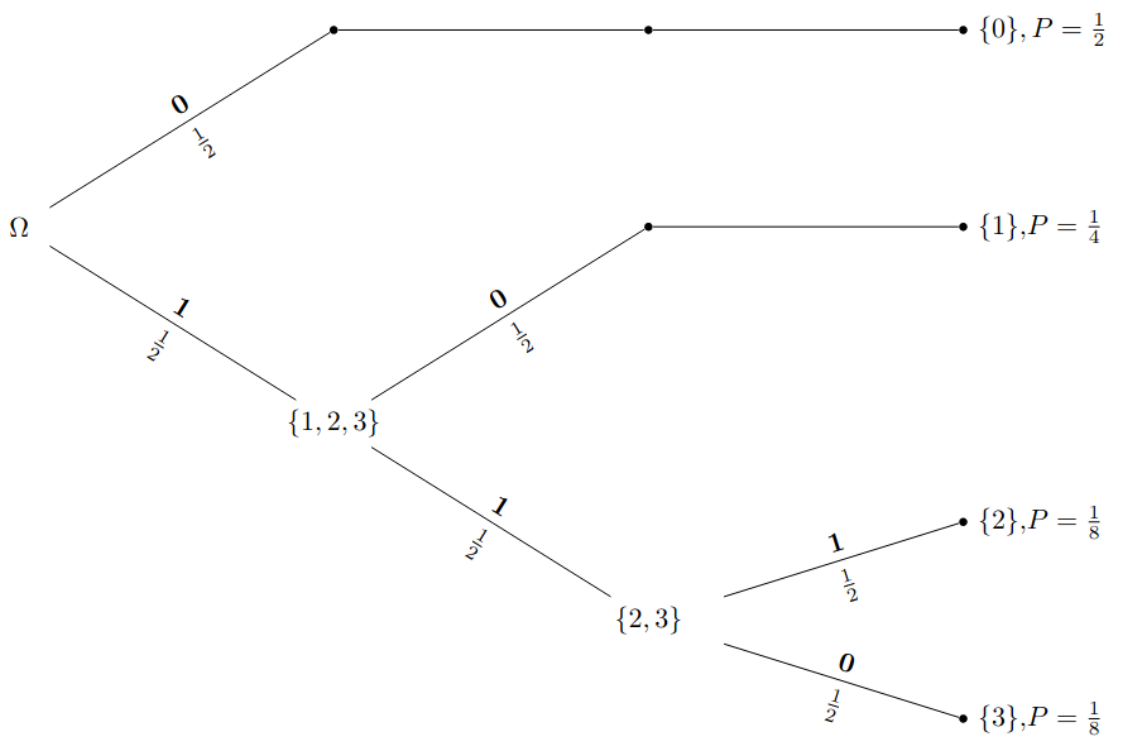

In [6]:
display(Image("./images/INF_prefix_codes_tree.png", width=500))

---

## 2.4 SHORT CODE LENGTH and KRAFT'S INEQUALITY

Codes with short average length can be obtained by assigning short codewords to the most probable outcomes and long codewords to the less probable ones. However, it is impossible for all outcomes to have short codewords, since **unique decodability imposes a constraint on the possible codeword lengths. This constraint is expressed by *Kraft’s inequality***:
$$
\sum_i 2^{-l_i} \le 1
$$

**A code that saturates to 1 this inequality is called a *complete code*.**  
**Prefix codes built from binary trees satisfy this condition with equality, so they are complete codes.**  
To understand this, note that each binary tree can be represented as a graph where every edge has probability $1/2$. The probability of reaching a leaf node is then the product of the probabilities along its path, so each leaf has probability $q_i = 2^{-l_i}$. Since the total probability must sum to 1, we obtain: $ \sum_i 2^{-l_i} = 1$

**Kraft’s inequality is a necessary but not sufficient condition for unique decodability.** For instance, if all symbols were mapped to the same codeword of length 1, the inequality would still hold, but the code would not be uniquely decodable. However, if a set of codeword lengths $\{l_i\}$ satisfies Kraft’s inequality, it is always possible to construct a prefix code with those lengths.

#### EXAMPLE

Consider a source with four letters $A_X = \{a, b, c, d\}$ and two different probability distributions:

1. Uniform: $p(a) = p(b) = p(c) = p(d) = 1/4$  
2. Skewed: $p(a) = 1/2, \, p(b) = 1/4, \, p(c) = 1/8, \, p(d) = 1/8$

We compare two different encodings:

1. Fixed-length code: $E_1 = \{a\to 00, b\to 01, c\to 10, d\to 11\}$  
2. Variable-length code: $E_2 = \{a\to 0, b\to 10, c\to 110, d\to 111\}$

*Uniform distribution case*:

- $E_1$: $L(E_1) = \sum_i p_i l_i = 1/4 \cdot 2 + 1/4 \cdot 2 + 1/4 \cdot 2 + 1/4 \cdot 2 = 2$ bits  
- $E_2$: $L(E_2) = 1/4 \cdot 1 + 1/4 \cdot 2 + 1/4 \cdot 3 + 1/4 \cdot 3 = 2.25$ bits  
$$
H[X] = - \sum_i p_i \log_2 p_i = 4 \cdot \frac{1}{4} \cdot 2 = 2
$$

Here, the fixed-length code $E_1$ is optimal, while $E_2$ is slightly worse.

*Skewed distribution* case:
- $E_1$: $L(E_1) = 1/2 \cdot 2 + 1/4 \cdot 2 + 1/8 \cdot 2 + 1/8 \cdot 2 = 2$ bits  
- $E_2$: $L(E_2) = 1/2 \cdot 1 + 1/4 \cdot 2 + 1/8 \cdot 3 + 1/8 \cdot 3 = 1.75$ bits  
$$
H[X] = -\Big( \frac{1}{2}\log_2 \frac{1}{2} + \frac{1}{4}\log_2 \frac{1}{4} + \frac{1}{8}\log_2 \frac{1}{8} + \frac{1}{8}\log_2 \frac{1}{8} \Big) = 1.75
$$

In this case, the variable-length code $E_2$ is optimal and achieves the entropy limit, while the fixed-length code $E_1$ is less efficient.  

This example shows how the average length depends on both the code assignment and the probabilities of outcomes, and how variable-length codes can reduce the average number of bits per message for skewed distributions.

---

## 2.5 LOWER BOUND FOR CODE LENGTH

A general lower bound for the expected code length can be expressed in terms of Shannon entropy.  
Consider a modified random variable $\tilde{X}$ with probabilities $q_i = \dfrac{2^{-l_i}}{z}$, where $l_i$ are integer code lengths and $z = \sum_j 2^{-l_j}$.  

Since $D_{KL}(p||q) \ge 0$ and $z \le 1$, with some math we obtain the lower bound:
$$
L(E, X) \ge D_{KL}(p||q) + H[X] \ge H[X]
$$

Equality holds if and only if:

1. $z = 1$, meaning the code is complete and saturates Kraft’s inequality  
2. $p_i = 2^{-l_i}$, that is, $l_i = -\log p_i$. This condition can only occur when all probabilities are negative powers of 2.  

However, since for nearly complete codes ($z \approx 1$) we have $L(E, X) \approx D_{KL}(p||q) + H[X]$, the optimal code minimizes the KL term by choosing lengths close to $l_i \approx -\log p_i$.  
**A practical choice is to take integer lengths as:**
$$
l_i = \lceil -\log p_i \rceil
$$
These lengths satisfy Kraft’s inequality and thus a prefix code with these lengths exists. For such a code, the expected length is bounded by

$$
L(E, X) = \sum_i p_i \lceil -\log p_i \rceil \le \sum_i p_i(-\log p_i + 1) = H[X] + 1
$$

Hence, the **Source Coding Theorem for symbol codes** states that for a random variable $X \in \mathcal{A}_X$, there exists a uniquely decodable (prefix) code $E$ such that:
$$
H[X] \le L(E, X) \le H[X] + 1
$$

This theorem establishes the Shannon entropy as a fundamental measure of information content, also in the context of lossless compression.

#### EXAMPLE
In the simple biase toin coss example with $p_H=0.9$ and $p_T=0.1$, we can encode $H \rightarrow 0$ and $T \rightarrow 1$.  
In this way $L(E)=1$, $H(p)=0.48$. We then have the guarantee from the source coding theorem:
$$
H[X] \le L(E) \le H[X] + 1 \quad \Rightarrow \quad 0.47 \le L(E) \le 1.47
$$

Generalizing to sequences of $n$ independent tosses, the **average length per symbol** approaches the entropy as $n$ grows:

$$
H[X] \le \frac{L(E)}{n} \le H[X] + \frac{1}{n} \quad \xrightarrow{n \to \infty} \quad \frac{L(E)}{n} \to H[X]
$$

This illustrates how, by encoding long sequences, the actual average number of bits per toss can get arbitrarily close to the theoretical limit given by the Shannon entropy.

---

## 2.6 HUFFMAN'S CODING

An algorithm to find optimal codes (with minimal expected length) is known as the Huffman procedure.  
**Huffman’s algorithm constructs an optimal binary tree recursively, starting from the leaves.**  
The steps are:
1. Create nodes for all elementary outcomes, and write them in ascending order.  
2. Select the two least probable nodes and merge them under a new parent node.  
3. Repeat the process, each time considering only nodes without parents, until a single root node remains.

By construction, this procedure assigns the two least probable outcomes codewords with the same length.  

#### EXAMPLE: THREE TOSSES OF BIASED COIN
Consider three independent tosses of a biased coin with probabilities $P(h) = 9/10$ and $P(t) = 1/10$.  
Defining a binary tree that splits the outcomes step by step, we obtain the prefix code:
$$
E_h :
\begin{cases}
hhh \to 0 \\
hht \to 100 \\
hth \to 101 \\
thh \to 110 \\
htt \to 11110 \\
tht \to 11100 \\
tth \to 11101 \\
ttt \to 11111
\end{cases}
$$

The expected code length for this Huffman code is

$$
L(E_h, X) = \frac{729}{1000} \cdot 1 + 3 \cdot \frac{81}{1000} \cdot 3 + 3 \cdot \frac{9}{1000} \cdot 5 + \frac{1}{1000} \cdot 5 = 1.58
$$

which is very close to the Shannon entropy $H[X^{(3)}] = 1.41$.


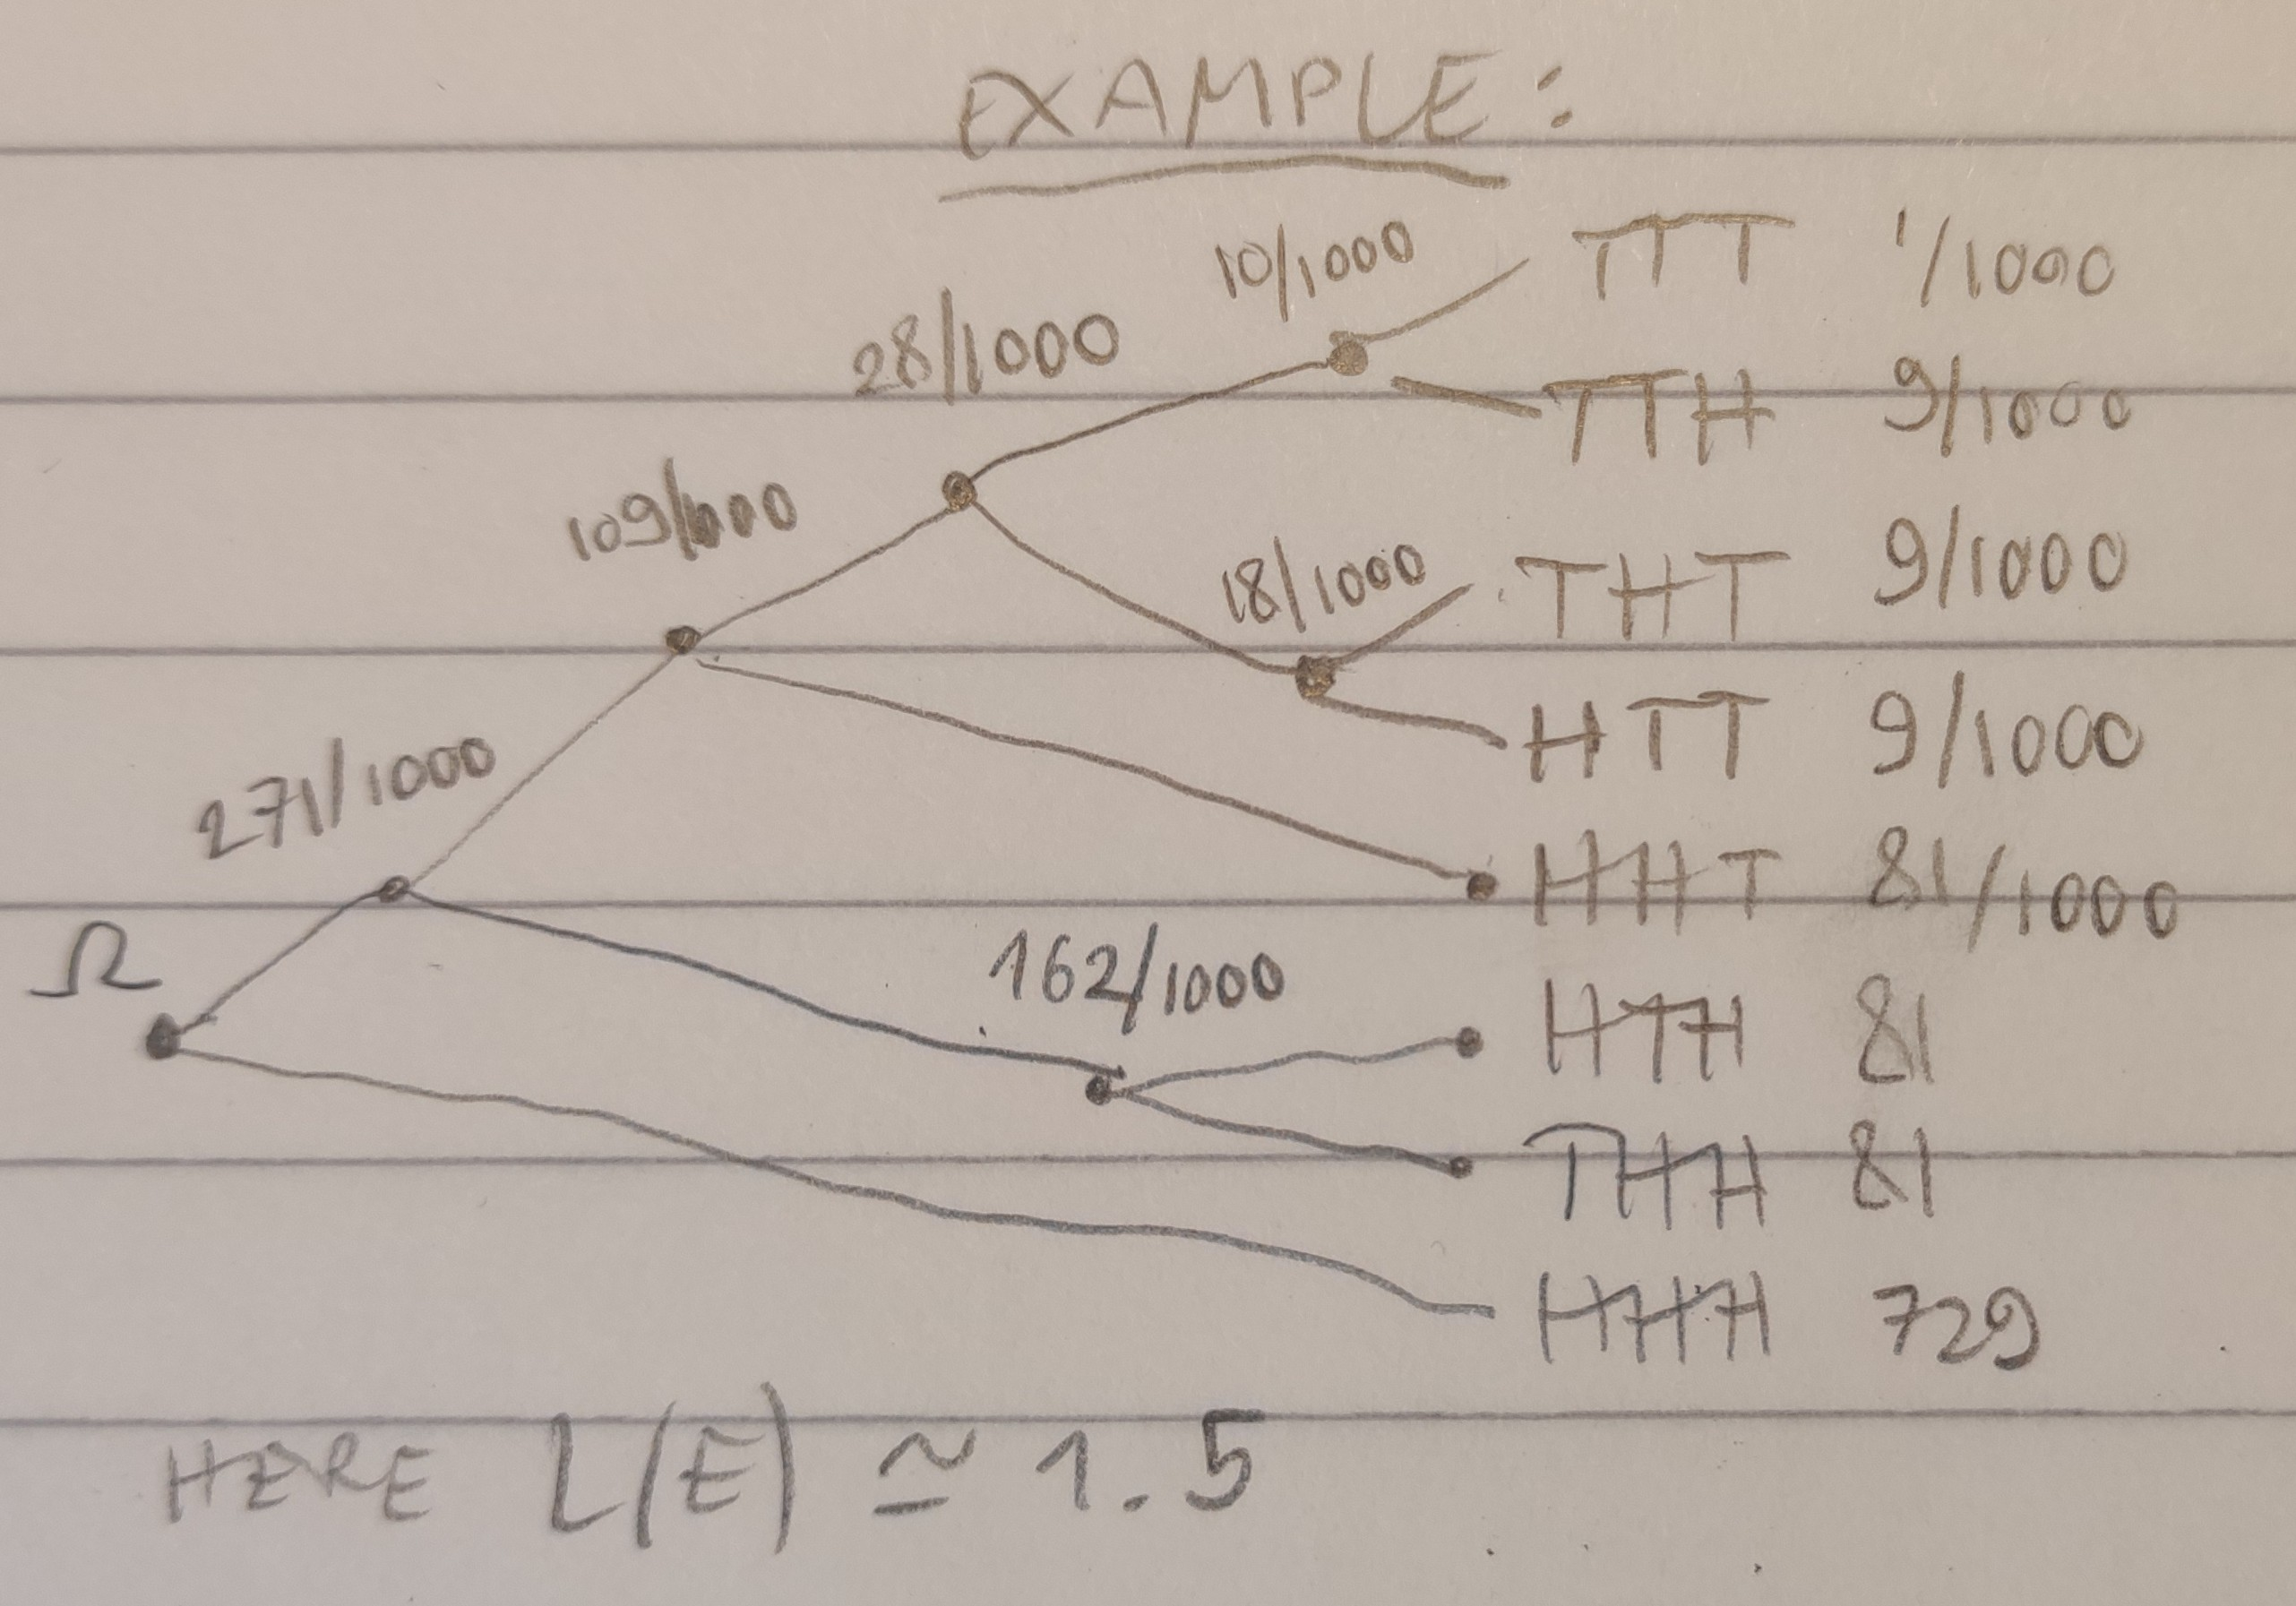

In [7]:
display(Image("./images/INF_huffman.jpg", width=500))

---

---

---

---

# 3 - INFORMATION COMPRESSION: LOSSY CODING

### INTRODUCTION

As usual, we consider sequences of messages $X^{(n)} = (X_1, X_2, \dots, X_n)$, where each $X_i$ is drawn independently from the same source (like many coin tosses), taking values in $A_X$ according to a probability distribution $P_X(x)$. The sequence $X^{(n)}$ is therefore a random vector taking values in $A_X^{(n)} = A_X \times A_X \times \dots \times A_X$. We want to encode these sequences using an encoding function $E^{(n)}$ that assigns binary codewords to sequences $x^{(n)} \in A_X^{(n)}$.  

If decoding must be perfectly faithful, the code length $K$ of our code must satisfy:
$$
K \ge H_0[X^{(n)}] = nH_0[X]
$$

where the equality follows from independence. However, **we can relax this requirement by allowing some error.**  

**We can design an encoding that assigns codewords only to a subset of sequences $S \subset A_X^{(n)}$. Sequences in the complementary set $\bar{S}$ will either be discarded, or mapped to already assigned codewords. A decoding error occurs whenever $x^{(n)} \in \bar{S}$. The probability of error is therefore:**
$$
P_e = P \Big[ D\Big( E(X^{(n)}) \Big) \ne X^{(n)} \Big] = P(X^{(n)} \in \bar{S})
$$

**To keep the error probability below a threshold $\delta$, we must choose $S$ as a $\delta$-sufficient subset, meaning**:
$$
P(S) = P(X^{(n)} \in S) > 1 - \delta
$$

The smallest such subset is defined as: $S_\delta[X^{(n)}] = \arg\min_{S \subset A_X^{(n)}} |S| \quad \text{such that} \quad P(X^{(n)} \in S) > 1 - \delta$

**The $\delta$-sufficient subset can be found by sorting the outcomes in decreasing order of probability and keeping the first $k$ for which:**
$$
\sum_{i=1}^k p(x_{\text{sorted}, i}) > 1 - \delta
$$

#### EXAMPLE

Consider three independent tosses of a biased coin with $p(h) = 0.9$ and $p(t) = 0.1$. The random variable $X^{(3)}$ represents the full outcome of the three tosses, taking values in $\{hhh, hht, hth, thh, htt, tht, tth, ttt\}$.

As already seen above, the probabilities of the outcomes are:

$$
P(hhh) = 0.729, \quad P(hht) = P(hth) = P(thh) = 0.081,
$$
$$
P(htt) = P(tht) = P(tth) = 0.009, \quad P(ttt) = 0.001
$$

The entropy is $H[X^{(3)}] = 3H[X] = 1.41$ (equality given by the independence of different tosses), while the raw bit content is $H_0[X^{(3)}] = \log_2(8) = 3$.

A perfectly invertible encoding can be defined as:

$$
E: \ hhh \to 000, \ hht \to 001, \ hth \to 010, \ thh \to 100, \ htt \to 011, \ tht \to 101, \ tth \to 110, \ ttt \to 111
$$

This code is fully reversible with zero error, $P_e(E) = 0$, and requires 3 bits per sequence.

However, the outcomes with more than one tail have a very low total probability:

$$
P(\{htt, tht, tth, ttt\}) = 0.028
$$

If we decide to encode only the most probable outcomes

$$
S = \{hhh, hht, hth, thh\}, \quad \bar{S} = \{htt, tht, tth, ttt\}
$$

we can define a lossy encoding:

$$
\tilde{E}: \ hhh \to 00, \ hht \to 01, \ hth \to 10, \ thh \to 11, \quad x \in \bar{S} \to \emptyset
$$

and a corresponding decoding

$$
\tilde{D}: \ 00 \to hhh, \ 01 \to hht, \ 10 \to hth, \ 11 \to thh, \ \emptyset \to \emptyset
$$

In this case, sequences in $\bar{S}$ are discarded, leading to an error probability

$$
P_e = P(\bar{S}) = 0.028 \rightarrow 2.8\%
$$

By accepting a 2.8% loss (ignoring rare outcomes), we reduce the number of relevant messages from 8 to 4 and use only 2 bits for encoding. This shows that, by tolerating a small error, we can compress the data below the full entropy bound.

Let's see now how the decoding behave: we can see the difference between a correctly decoded and a wrongly decoded sequence.

- *Correctly decoded example*
    - Let the original message be $x^{(3)} = hth$ 
    - The encoder produces $\tilde{E}(hth) = 10$  
    - and the decoder reconstructs $\tilde{D}(10) = hth$  
    The reconstruction matches the original message, so decoding is correct.

- *Wrongly decoded example*
    - Let the original message be $x^{(3)} = tht$  
    - The encoder produces $\tilde{E}(tht) = \emptyset$ since this sequence belongs to $\bar{S}$.  
    - The decoder receives no valid codeword and outputs $\tilde{D}(\emptyset) = \emptyset$  
    Thus, the reconstructed message does not match the original one. This corresponds to a decoding error.


---

## 3.1 ESSENTIAL BIT CONTENT

**The *essential bit content* is defined as the number of bits required to encode $X$ if we tolerate an error probability $\delta$, using a fixed-length code**:
$$
H_\delta[X^{(n)}] = \log_2 |S_\delta[X^{(n)}]|
$$

We can also define the **normalized essential bit content** $H_\delta[X^{(n)}]/n$, which **represents the average number of bits required to encode each individual symbol** in the sequence, assuming we allow an error probability $\delta$.  
From the image below we can see that as $n$ increases (like $n$ coin tosses), $H_\delta[X^{(n)}]/n$ tends to become flat and approaches the entropy of the single event $H[X]$ (ex. single coin toss). This means that for large $n$ and some small $\delta_1$, it holds:
$$
H_\delta[X^{(n)}]/n = H[X] + \beta
$$
for some value $\beta \ll 1$. The $\delta$-sufficient subset then has a size approximately equal to

$$
|S_\delta[X^{(n)}]| \approx 2^{n(H[X] + \beta)}
$$

Hence, if we tolerate a small error $\delta_1$, we can use a code with approximately $2^{n(H[X] + \beta)}$ codewords.



However, the essential bit content becomes substantially lower than $H[X]$ only when we tolerate a very large error $\delta_2 \approx 1$. For large $n$,

$$
H_\delta[X^{(n)}]/n < H[X] - \beta \quad \text{only if} \quad \delta \to 1
$$

Therefore, if we use fewer than roughly $2^{n(H[X] + \beta)}$ codewords, we will incur a large error.

**These results show that it is possible to encode messages with a small error probability using about $H[X]$ bits per message, but not fewer.** The following section will formalize this through Shannon’s source coding theorem.

#### EXAMPLE
For example, for $n = 1000$ biased coin tosses, $\delta_1 = 0.05$ error threshold, and $\beta \approx 0.05$, the essential bit content per message is: $$H_\delta/n = H[X] + \beta = 0.46 + 0.05 = 0.51$$ meaning we can code with an error probability of 0.05 using about 0.51 digits per symbol.

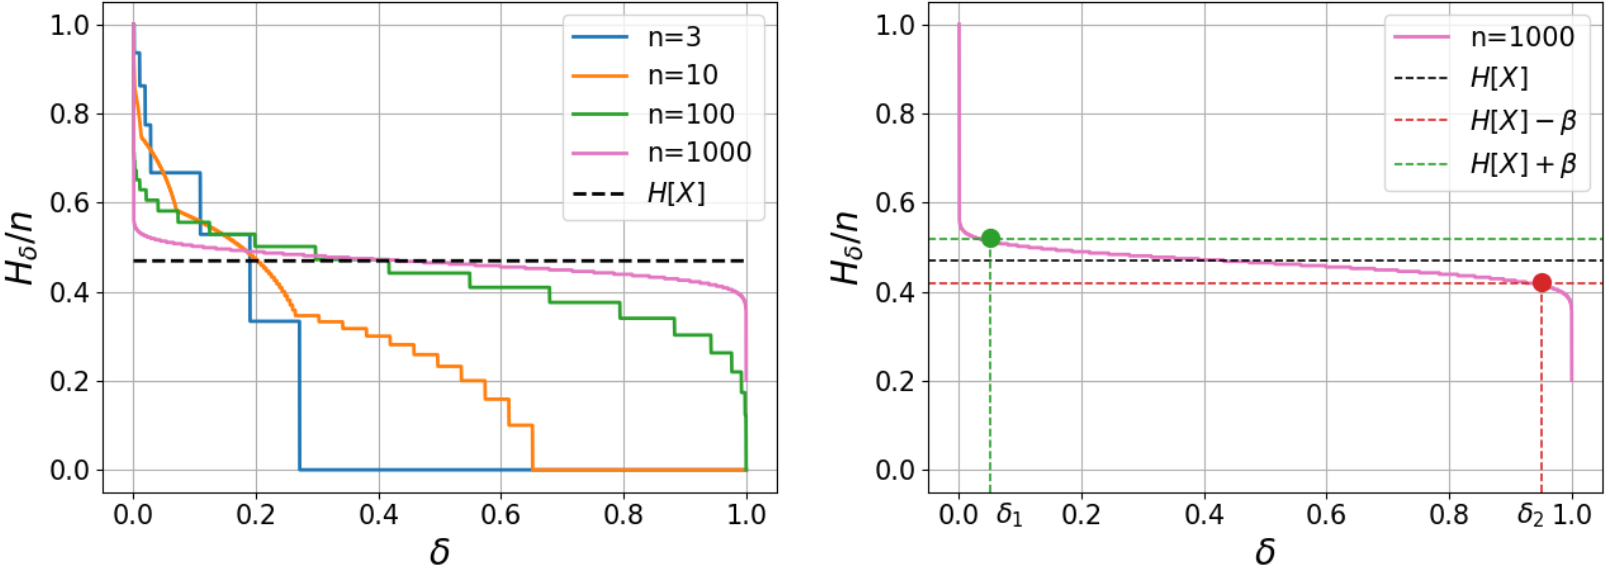

In [6]:
display(Image("./images/INF_essential_bit_content.png", width=1000))

---

## 3.2 TYPICALITY

The behavior of $H_\delta[X^{(n)}]$ for large $n$ is linked to the concept of typical sequences.  
**When $n$ becomes large, typical sequences are those in which the number of times $m_i$ that a symbol $x_i$ appears is approximately proportional to its probability, that is $m_i \simeq n p_i$.**
For example, in the case of biased coin tosses with $p(h) = 0.9$, typical sequences contain roughly $0.9n$ zeros and $0.1n$ ones. For example in 1000 tosses a *typical sequence* is one that contains about 900 heads and 100 tails.  
So, in other words, **typical sequences are what we could call *typical* also in general speech, not rare ones with almost only zeros or almost only ones.**

The probability of such a sequence $x^{(n)}$ is approximately:
$$
P(x^{(n)}) \approx p_1^{n p_1} \, p_2^{n p_2} \, \dots p_k^{n k_2}
$$

and its information content is therefore:
$$
I^{(n)} = -\log P(x^{(n)}) \approx -n p_1 \log_2 p_1 -n p_2 \log_2 p_2 \cdots = -n \sum_i p_i \log_2 p_i = nH[X]
$$

which means we can approximate the probability of observing a specific typical sequence $x^{(n)}$:
$$
P(x^{(n)}) \approx  2^{-nH[X]}
$$

More formally, we define the **set of β-typical sequences as:**
$$
T_{n\beta} = \left\{ x^{(n)} \in A_X^n \ \text{such that} \ \left| -\frac{1}{n} \log P(x^{(n)}) - H[X] \right| < \beta \right\}
$$

Typical sequences are those whose per-symbol information content is close to the entropy $H[X]$ within a margin $\beta$. SO here $\beta$ is like a *precision* parameter for the strictness of the definition of typicality.

**As $n$ increases, it becomes increasingly likely that a random sequence drawn from the source will be typical.** In the biased coin example with $p = 0.9$, the probability distribution of the number of ones becomes sharply peaked around $0.1n$, meaning that almost all sequences have approximately $0.9n$ zeros and $0.1n$ ones.

**Hence, as the sequence length grows, it becomes virtually certain that a randomly drawn sequence will have an information content close to $nH[X]$.**

---

## 3.3 SHANNON'S SOURCE CODING THEOREM

Our goal is to construct a lossy code for $X^{(n)}$ while keeping the maximum error probability below a threshold $\delta$.  
To do this, we identify the smallest $\delta$-sufficient subset. Sequences in this subset are encoded, while those outside are discarded. The number of digits required to represent such a code is given by the essential bit content $H_\delta = \log |S_\delta|$.  

For large $n$, it becomes almost certain that a random sequence is typical. Since all typical sequences have probability close to $2^{-nH[X]}$ and their total probability sums to about 1, there are approximately $2^{nH[X]}$ typical sequences. Hence, the $\delta$-sufficient subset has size about $2^{nH[X]}$.  
Therefore, the smallest $\delta$-sufficient subset cannot be larger than this, meaning: 
$$|S_\delta[X^{(n)}]| \lesssim 2^{nH[X]}$$  
and we can construct a lossy code with codeword length roughly $nH[X]$ bits.

#### THEOREM
Mathematically, the theorem states that:
$$
\forall \delta > 0, \forall \beta > 0, \exists n_0 \text{ such that } \forall n > n_0, \ |H_\delta(X^{(n)}) - nH[X]| < n\beta
$$

In words:

- For any arbitrarily small $\delta$ and $\beta$, and for sufficiently large $n$, we can achieve lossy compression of $X^{(n)}$ using $n(H[X] + \beta)$ bits (that is, $2^{n(H[X]+\beta)}$ codewords) with an error probability $\delta$.
- It is impossible to compress $X^{(n)}$ using fewer than $n(H[X] - \beta)$ bits without the error probability approaching 1.

Consequences:
- The information from $n$ independent realizations of a random variable $X$ can be transmitted using $H[X]$ binary digits per symbol, with vanishing information loss as $n$ increases.
- The same information can be effectively compressed into a binary string of length $nH[X]$ bits, representing the theoretical limit of compression efficiency.

#### INTERPRETATION

Shannon’s Source Coding Theorem tells us the **fundamental limit of data compression**.

Imagine a source (like a coin, a text generator, or a sensor) that produces independent symbols according to some probability distribution.  
Each symbol carries a certain amount of information on average — this amount is measured by the entropy $H[X]$ (in bits per symbol).

Now, suppose we want to compress the messages produced by the source:

- If we use *fewer than $H[X]$ bits per symbol*, we won’t be able to represent all possible messages correctly — the probability of decoding errors will approach 1 as we increase the message length.
- If we use *about $H[X]$ bits per symbol*, we can compress the data almost perfectly, with the error probability becoming negligible as messages get longer.

In other words, **the theorem tells us that $H[X]$ is the absolute lower bound on the average number of bits needed to represent one symbol from the source.** It is impossible to compress below this limit without losing information. But it is possible to get arbitrarily close to this limit with negligible error, if we use long enough sequences and good coding schemes (like Huffman coding).

This theorem provides a **benchmark**: any real compression algorithm can be evaluated by how close it gets to Shannon’s limit.
It also shows that entropy is the measure of information content — no matter what kind of source we have.
Compression algorithms like ZIP, PNG, or MP3 are all based on this idea — they aim to reach the Shannon limit for real-world data.

#### EXAMPLE

Consider a simple source: a biased coin with $P(H) = 0.9, \quad P(T) = 0.1$.

The entropy per coin toss is: $H[X] = -[0.9 \log_2 0.9 + 0.1 \log_2 0.1] \approx 0.47 \text{ bits per toss}$  
This means, on average, each coin toss carries about 0.47 bits of information.

Suppose we toss the coin $n = 1000$ times. The total information content is roughly:
$$
n H[X] = 1000 \cdot 0.469 \approx 469 \text{ bits}
$$

*Lossless encoding*:
If we were to encode each toss individually with a fixed-length code, we would need 1 bit per toss, totaling 1000 bits.  
This is clearly inefficient, because the actual information content is only 469 bits.

*Lossy or typical-sequence encoding*:

Using the idea of typical sequences:
- Most sequences will have roughly 900 heads and 100 tails.
- There are far fewer “typical” sequences than all $2^{1000}$ possible sequences.
- We can assign shorter codewords to these typical sequences and ignore extremely rare sequences.

If we allow a small error probability, e.g., $\delta = 0.05$, we can encode the typical sequences using about:
$$
H_\delta / n \approx H[X] + \beta \approx 0.469 + 0.05 = 0.519 \text{ bits per toss}
$$

- This means we can compress 1000 tosses into roughly 519 bits, losing information only 5% of the times
- Shannon’s theorem guarantees that **no clever coding can do better than 0.469 bits per toss on average** without losing information.
- By using long sequences and exploiting typicality, we can approach this theoretical limit very closely.

Shannon’s source coding theorem states that for large $n$ and any small $\beta > 0$ and error tolerance $\delta > 0$, the essential bit content $H_\delta[X^{(n)}]$ satisfies:
$$
n(H[X] - \beta) \ \lesssim \ H_\delta[X^{(n)}] \ \lesssim \ n(H[X] + \beta)
$$

Then the theorem predicts:
$$
1000 \cdot (0.469 - 0.05) \lesssim H_\delta[X^{(1000)}] \lesssim 1000 \cdot (0.469 + 0.05)
$$

$$
419 \lesssim H_\delta[X^{(1000)}] \lesssim 519 \ \text{bits}
$$

- This means: if we allow a small error probability $\delta$ (e.g., 5%), we can compress the 1000 tosses into roughly 519 bits.  
- Trying to compress below 419 bits would make the error probability extremely high ($\delta \to 1$).  

---

---

---

---

# 4 - NOISY CHANNELS
**Signals transmitted over a medium are often corrupted by noise, resulting in a noisy channel**.  
A common case is the *bit flip*, where a bit is inverted due to techincal/electric reasons.  

---

## 4.1 DECODING in NOISY CHANNELS as an INFERENCE PROBLEM
The sender encodes a message $X$ into a binary string $Z = E(X)$, but the receiver may get a different string $Y \neq Z$. Decoding produces an estimate $X' = D(Y)$.  
We can see in this structure a bayesian framework:
- $P_Z$ is the prior of our 'model' $Z$, i.e. the a priori probability that the original message was $Z$
- $P_{Y|Z}$ is the likelihood, i.e. the probability of observing our data $Y$ given our 'model'$Z$
- $P_{Z|Y}$ is the posterior, i.e. the probability of observing our 'model'$Z$ given our data $Y$
- $P_Z$ is the evidence of our data $Y$, i.e. the a priori probability of receiving the message $Y$

Note: we will use $X$ and $Z$ as they were thing even if technically one is the original message and the second its encoded version

Reconstructing $X$ from $Y$ can be seen as a general inference problem. In the discrete case:
- $X \in A_X$ is the original message (latent variable)  
- $Y \in A_Y$ is the received message (observed variable)  
- They are related by the **joint probability** $P_{XY}(x, y)$  

**The decoder acts as an estimator.** An estimator is a function that takes observed data and produces a guess for an unknown quantity. In our context, the unknown quantity is the original message $X$. The observed data is the received message $Y$. The decoder $D$ is an estimator:
$$
X' = D(Y)
$$

#### LOSS FUNCTION

**The quality of an estimate $X'$ can be measured by a *loss function*** (0-1, quadratic...). Which means the best estimator depends on the chosen loss!  
In the discrete case, a simple choice is this loss function that is $0$ when the estimate is correct, and $1$ when it is wrong.:
$$
\ell(x', x) = 1 - \delta_{x', x}
$$

#### POSTERIOR RISK

**The *Posterior Risk* corresponds to the probability of error (or average loss) when the received message is $y$, using the decoding $D$**. It is given by:
$$
R_D(y) = \sum_{x \in A_X} P_{X|Y}(x|y) \, \ell(D(y), x)
$$
where $D(y)$ is the decoded message $x'$, obtained by decoding $y$. For our loss function, this simplifies to:
$$
R_D(y) = 1 - P_{X|Y} \Big( D(y) | y \Big)
$$

**The overall probability of error using the decoding $D$, averaged over all possible received messages, is called the *Bayes risk***:
$$
R_D = \sum_{y \in A_Y} P_Y(y) \, r_D(y) = \sum_{y \in A_Y} \sum_{x \in A_X} P_{XY}(x, y) \, \ell(D(y), x)
$$

#### MAP ESTIMATOR

The **Maximum a Posteriori (MAP) estimator is a specific type of estimator that chooses the value of $X$ that is most likely given the observed $Y$**. It minimizes both the posterior and Bayes risks. In the discrete case it is given by:
$$
D_{\text{map}}(y) = \arg \max_{x \in A_X} P_{X|Y}(x | y)
$$

**For each received message $y$, it chooses the original message $x$ that has the highest posterior probability given $y$**. It is optimal in the sense that it minimizes the probability of error when using the 0-1 loss function.


> This inference perspective provides the theoretical foundation and a general framework for thinking about decoding in noisy channels. It’s not a specific algorithm; rather, it’s a conceptual way to describe what every decoder is trying to do in case of noisy channels.

#### EXAMPLE

Suppose we have a discrete source $X$ that can take values $A$ or $B$, and a noisy channel that produces $Y$ which can also be $A$ or $B$.  
The joint probabilities are:

| X | Y | P(X,Y) |
|---|---|---------|
| A | A | 0.4     |
| A | B | 0.1     |
| B | A | 0.2     |
| B | B | 0.3     |

**Step 1**: Compute the Posterior Probabilities

The posterior $P(X|Y)$ is computed using the Bayes theorem:
$$
P(X=x | Y=y) = \frac{P(X=x, Y=y)}{P_Y(y)}
$$
where $P_Y(y) = \sum_{x \in \{A,B\}} P(X=x, Y=y)$.

- For $Y = A$:

$$
P_Y(A) = P(A,A) + P(B,A) = 0.4 + 0.2 = 0.6
$$

$$
P(X=A | Y=A) = 0.4 / 0.6 \approx 0.667
$$

$$
P(X=B | Y=A) = 0.2 / 0.6 \approx 0.333
$$

- For $Y = B$:

$$
P_Y(B) = P(A,B) + P(B,B) = 0.1 + 0.3 = 0.4
$$

$$
P(X=A | Y=B) = 0.1 / 0.4 = 0.25
$$

$$
P(X=B | Y=B) = 0.3 / 0.4 = 0.75
$$

**Step 2**: Apply the MAP Estimator

The MAP estimator chooses the $X$ with the highest posterior probability given $Y$:

- If $Y = A$, then $X' = A$ (since $0.667 > 0.333$)  
- If $Y = B$, then $X' = B$ (since $0.75 > 0.25$)

We have now finished our decoder $D$! If we observe $A$, we decode it like $A$; if we observe $B$, we decode it like $B$.

**Step 3**: Posterior Risk (Probability of Error for each $Y$)

Using the 0-1 loss function $R_D(Y) = 1 - P(X'|Y)$:
- For $Y = A$: $r_D(A) = 1 - 0.667 \approx 0.333$  
- For $Y = B$: $r_D(B) = 1 - 0.75 = 0.25$

**Step 4**: Overall Bayes Risk (Average Probability of Error)

$$
R_D = \sum_{y} P_Y(y) r_D(y) = 0.6 \cdot 0.333 + 0.4 \cdot 0.25 \approx 0.3
$$
So using the MAP estimator, the overall probability of error is approximately 0.3.


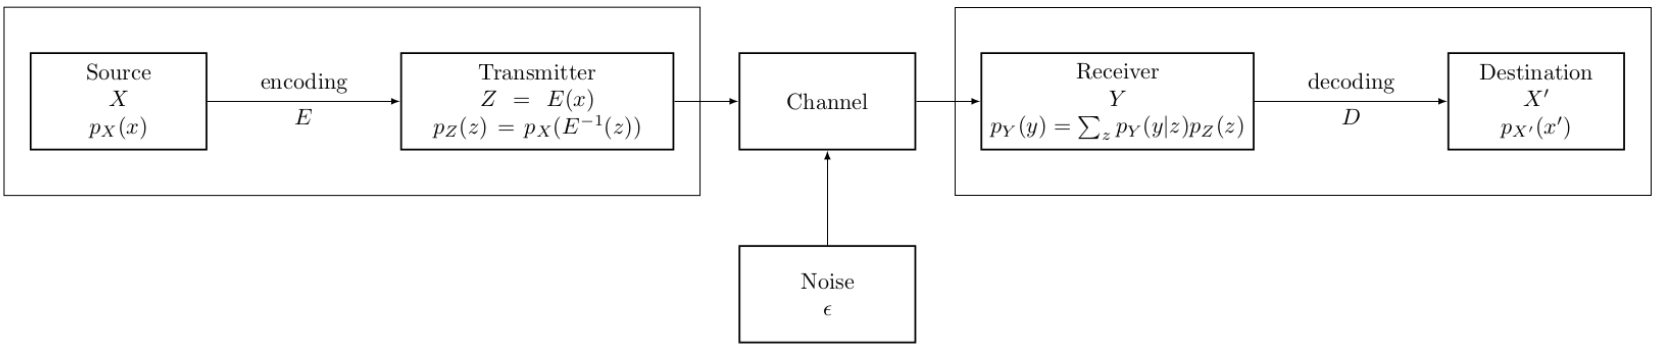

In [8]:
display(Image("./images/INF_noisy_structure.png", width=1100))

---

## 4.2 ERROR-CORRECTING CODE

We have seen how to approach the noisy problem, but what code can we actually use to fight it?  
When a channel is affected by noise, the sender can use a more robust type of code, called an *error-correcting code*.  
**The main idea is to add redundancy/repetitions to the transmitted message so that errors introduced by noise can be detected and, in some cases, corrected.**

Adding redundancy makes codewords longer. This means there is a trade-off between efficiency and accuracy: longer, redundant codes allow more accurate decoding, but they reduce the amount of useful information transmitted per symbol.

Error-correcting codes are practical realizations of Shannon’s theorem (that we will see): they allow reliable transmission at rates $R$ approaching the channel capacity $C$.

Let's see some useful informations we will use in these kind of codes.

#### NON-CONFUSABLE CODEWORDS

In an ideal communication system, the decoder should always be able to determine exactly which codeword was sent. This happens when the codewords are non-confusable.  
**Two codewords are said to be non-confusable if, after passing through the channel, their possible outputs never overlap.** In other words, each transmitted codeword $z_i$ produces outputs $y \in A_Y$ that belong to a distinct subset of the output alphabet.

Formally, this means that the channel maps each codeword $z_i$ to a disjoint region of $A_Y$:

$$
\forall y \in A_Y, \quad \exists! \, i \text{ such that } P(Z = z_i \mid Y = y) > 0
$$

This condition guarantees that every received sequence $y$ can be associated with exactly one possible transmitted codeword $z_i$, allowing perfect decoding with no errors.

Intuitively, if we think of the channel as a noisy transformation that "blurs" the input codewords, non-confusable codewords are chosen far enough apart so that their blurred regions never overlap.  
The drawback of using non-confusable codewords is that, to ensure they remain distinct under the action of the noisy channel, we often need to select only a small subset of the original alphabet. This restriction guarantees optimal decoding accuracy but comes at the cost of reducing the number of possible codewords. As a result, the transmission rate becomes limited, since we can encode less information per channel use.  
You can see the example of the noisy typewriter below.


#### INFORMATION TRANSMISSION RATE

The ***Information transmission rate* measures the effective number of bits of information transmitted per coded digit:**
$$
R = \frac{\log_2 |S|}{L(E)} = \frac{ \text{log of the number of codewords} }{ \text{avg codeword length} }
$$

If $|S| = 2^K$, then:

$$
R = \frac{K}{L(E)}
$$

From the discussion in Section 3.1, for a code to be decodable, it must satisfy $R < 1$ because the number of possible messages $|S|$ must be smaller than the number of possible binary strings of length $L$, i.e. $|S| \le 2^L$.  
Therefore, adding redundancy (to make the code more robust) reduces $R$, since fewer of the $2^L$ possible codewords are actually used for transmission.

### 4.2.1 REPETITION CODE

A **repetition code** is the simplest form of error-correcting code. It is also, as we will see, an instance of Block Code: a $(1,n)$ block code.  
**The idea is to repeat each bit of the message several times so that the receiver can recover the original bit by *majority voting***.

For example, if we want to send one bit $x \in \{0,1\}$ through a noisy channel, we can encode it as:
$$
E(0) = 000,\quad E(1) = 111
$$

If the channel flips one of the bits (for example due to noise), the receiver might get a sequence like `001` or `110`.  
The decoder then applies the **majority rule**:

- **If most of the bits are 0 → decode as 0**  
- **If most of the bits are 1 → decode as 1**  

This way, even if one bit is corrupted, the original message can still be correctly reconstructed.

The repetition code increases robustness but also adds redundancy:
- The codeword length becomes longer (in this case, 3 times longer)
- The transmission rate decreases, since fewer effective bits are sent per transmitted bit

In this example, if the original message length is 1 and the encoded message length is 3, the rate is:

$$
R = \frac{1}{3}
$$

So the repetition code illustrates the basic trade-off: **more redundancy → better error correction but lower rate**.
Although this method improves reliability, it is extremely inefficient because it lowers the transmission rate drastically.  
Repetition codes are mainly pedagogical examples to introduce redundancy and basic decoding concepts.

### 4.2.2 HAMMING CODES (UNFINISHED-------------)

**Hamming codes** are a more efficient family of block codes.  
They achieve **single-bit error correction** with much less redundancy than repetition codes.  
They are constructed using **parity bits** placed at specific positions in the codeword, and can detect and correct certain errors using the **syndrome decoding** technique.

#### EXAMPLE

The Hamming code H(7,4) is a classic example of an error-correcting code.    
It encodes 4 bits of information into 7 bits by **adding 3 parity bits that allow the receiver to detect and correct single-bit errors**.

The first 4 bits represent the **message bits**, and the last 3 bits are **parity bits** calculated as:

$$
z_5 = z_1 \oplus z_2 \oplus z_3
$$

$$
z_6 = z_2 \oplus z_3 \oplus z_4
$$

$$
z_7 = z_1 \oplus z_2 \oplus z_4
$$

The parity bits are designed so that certain combinations of bits have **even parity**.  
Each parity bit checks a specific subset of the message bits, allowing the receiver to locate and correct single-bit errors later.

Assume transmission occurs through a **binary symmetric channel** with flip probability $f$.  
If the transmitted codeword is $z$, the received word is:

$$
y = z \oplus \epsilon
$$

where $\epsilon$ is a noise vector whose entries are 1 where a bit was flipped.  
The probability of a given noise pattern $\epsilon$ is:

$$
P(\epsilon) = f^{m(\epsilon)} (1 - f)^{7 - m(\epsilon)}
$$

where $m(\epsilon)$ is the number of flipped bits.

According to the **MAP (Maximum A Posteriori) rule**, the optimal decoder chooses the codeword $z$ that maximizes $P(z|y)$, which is equivalent to minimizing the number of bit differences between $z$ and $y$:

$$
D_{\text{MAP}}(y) = \arg \min_{z \in \text{Im}(E)} m(y \oplus z)
$$


#### Parity-Check Matrix and Syndrome

To efficiently detect which bit was flipped, we define the **parity-check matrix**:

$$
H =
\begin{pmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 1
\end{pmatrix}
= [-P^T \, | \, I_3]
$$

Given the received vector $y$, the **syndrome** is:

$$
s = Hy
$$

The syndrome represents the pattern of parity-check violations.  
It allows us to determine **which bit is likely wrong**.  
If $s = 000$, there are no errors; otherwise, each possible non-zero syndrome corresponds to a specific bit flip:

| Syndrome | Bit to flip |
|-----------|-------------|
| 000 | none |
| 001 | z₇ |
| 010 | z₆ |
| 100 | z₅ |
| 011 | z₄ |
| 101 | z₁ |
| 110 | z₂ |
| 111 | z₃ |


#### Error Probability

This code can correct all **single-bit errors**, but fails when more than one bit is flipped.  
Since two-bit errors occur with probability on the order of $O(f^2)$, the overall error probability is approximately:

$$
P_e = O(f^2)
$$


#### Trade-off

The Hamming H(7,4) code demonstrates the typical trade-off in coding theory:
- By adding 3 redundant bits, we gain strong error correction capability.
- The transmission rate decreases from 1 to $R = \frac{4}{7}$, but the decoding accuracy improves significantly.


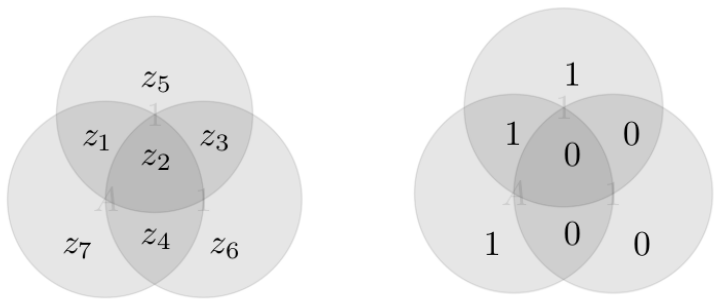

In [3]:
display(Image("./images/INF_hamming_code.png", width=500))

---

## 4.3 CHANNEL CAPACITY

When we send information through a noisy channel, we want two opposite goals:  
the transmission rate $R$ should be as large as possible, while the probability of error $P_e$ should be as small as possible.  
The key question is: what is the best trade-off we can achieve between these two quantities?

Surprisingly, achieving $P_e \to 0$ does not require $R \to 0$.  
In other words, **it is possible to communicate with an arbitrarily small error while still maintaining a non-zero transmission rate.**  
This is the essence of Shannon’s channel coding theorem.

There exists a finite positive number $C$, called **channel capacity**, such that:
- if $R < C$, we can design a code that achieves $P_e \to 0$  
- if $R > C$, no code can keep $P_e$ small

**The channel capacity represents the maximum amount of information that can be transmitted per symbol with negligible error $\delta$.**  
It is defined as the maximum (over all possible input distributions $p_X(x)$) of the *mutual information* between the sent and received variables:
$$
C = \max_{p_X(x)} I(X; Y)
$$

This means that capacity depends both on the physical characteristics of the channel and on how we choose the distribution of the transmitted symbols.

### 4.3.1 EXAMPLE: Binary symmetric channel (BSC) (UNFINISHED-------------)

If the channel introduces no errors, then $Y = X$ and the mutual information becomes: $I(X; Y) = H(X)$  
In this case, the channel capacity is: $C = \max_{p_X} H(X)$

From Shannon’s source coding theorem, we already know that it is possible to reach a transmission rate $R$ arbitrarily close to $H(X)$ with $P_e \to 0$.

---

Let's make it more practical, considering a Binary symmetric channel (BSC) where each transmitted bit flips with probability $f$.  
Let $p_0 := p_X(0)$ and $p_1 := p_X(1)$ are the probabilities of the original message being respectively 0 or 1.  
If $f$ is the probability of bit flip, $1-f$ is the probability of receiving the correct digit.
The joint probabilities are so:
$$
\begin{aligned}
p_{XY}(0, 0) &= p_0 (1 - f) \\
p_{XY}(0, 1) &= p_0 f \\
p_{XY}(1, 0) &= p_1 f \\
p_{XY}(1, 1) &= p_1 (1 - f)
\end{aligned}
$$

**Step 1**: Compute the mutual information.  
By definition,
$$
I(X:Y) = H(Y) - H(Y|X)
$$

The conditional entropy $H(Y|X)$ depends only on the channel noise $f$, since given $X$ the output $Y$ is flipped with probability $f$:

$$
H(Y|X) = H_2(f)
$$

where $H_2(p) = -p \log_2 p - (1 - p) \log_2(1 - p)$ is the binary entropy function.

Next, we compute $H(Y)$.  
The marginal distribution of $Y$ is:

$$
p_Y(0) = p_0 (1 - f) + p_1 f = f + p_0 (1 - 2f)
$$

and $p_Y(1) = 1 - p_Y(0)$.  
Thus,

$$
H(Y) = H_2(p_Y(0)) = H_2(f + p_0 (1 - 2f))
$$

Putting everything together:

$$
I(X:Y) = H_2(f + p_0 (1 - 2f)) - H_2(f)
$$

**Step 2**: Maximize over the input distribution.  

To find the capacity, we maximize $I(X:Y)$ with respect to $p_0$:

$$
C = \max_{p_0} \, [H_2(f + p_0 (1 - 2f)) - H_2(f)]
$$

It can be shown that the maximum occurs for $p_0 = 1/2$ (i.e., when both symbols are equally likely).  
In this case, $p_Y(0) = 1/2$ and $H_2(p_Y(0)) = 1$ bit.

Therefore, the **capacity of the binary symmetric channel** is:

$$
C = 1 - H_2(f)
$$

This expression tells us that as the channel becomes noisier (larger $f$), the capacity decreases.  
When $f = 0$ (no noise), $C = 1$ bit per channel use.  
When $f = 0.5$ (completely random output), $C = 0$ — meaning no information can be transmitted reliably.

---

## 4.4 BLOCK CODING (K, n)

**A block code groups symbols into blocks of fixed length $n$, encoding $K$ bits of information into each block.**  
**In other words, instead of sending individual bits, we send groups (or blocks) of them together after applying an encoding rule.**  
The rate of the code is:

$$
R = \frac{K}{n}
$$

which measures how much actual information (in bits) is sent per transmitted symbol.  
If $n$ is large enough and $R < C$ (where $C$ is the channel capacity), the channel coding theorem ensures that the probability of decoding error can be made arbitrarily small.

We have already seen two examples of block codes: repetition codes and Hamming codes!

---

#### EXAMPLE

Suppose we want to send 2 bits of information using blocks of length $n = 3$.  
This is a $(K=2, n=3)$ block code, with rate $R = 2/3$.  
There are $2^K = 4$ possible messages, so we must define 4 codewords of length 3.

Let’s say our alphabet is binary: $A_Z = \{0, 1\}$.  
We can define our codewords as:

| Message (2 bits) | Codeword (3 bits) |
|------------------|-------------------|
| 00 | 000 |
| 01 | 011 |
| 10 | 101 |
| 11 | 110 |

Each message $x_i$ (2 bits) is mapped to a codeword $z_i$ (3 bits).  
This redundancy (3 instead of 2 bits) allows the receiver to detect and possibly correct errors if noise alters one bit.

---

A decoder takes a received sequence $y^{(n)} \in A_Y^n$ and maps it back to one of the valid codewords:

$$
D^{(n)} : A_Y^n \to S^{(n)}
$$

For example, if the receiver gets $y = 111$, it may decode it as $z' = 110$, since that is the closest valid codeword.

The *probability of block error* is the chance that the decoded codeword differs from the transmitted one:
$$
P_{e,b} = P(Z' \neq Z) = P(D(Y) \neq Z)
$$

and the *maximum probability of block error* (the worst case across all codewords) is:
$$
P_{e,\text{max}} = \max_z P(Z' \neq Z \mid Z = z)
$$


Block codes thus provide a structured way to introduce redundancy and protect information from noise.  
They are the foundation for many families of error-correcting codes, such as repetition codes and Hamming codes.

### 4.4.1 NON-CONFUSABLE CODEWORDS

In block coding, non-confusable codewords are used to ensure that each transmitted codeword can be uniquely identified at the receiver, even in the presence of noise. The key idea is to choose codewords $z \in S^{(n)}$ such that the sets of possible received sequences they can produce under the channel do not overlap. This guarantees reliable decoding.

**A necessary condition for non-confusability is:**
$$
n_Z \cdot n_{Y|Z} \le n_Y,
$$

where $n_Z$ is the number of codewords, $n_{Y|Z}$ is the number of possible outputs for each codeword, and $n_Y$ is the total number of possible received sequences. Taking logarithms, this becomes:

$$
H[Z] + H[Y|Z] \le H[Y],
$$

where $H[Y|Z]$ is the conditional entropy of the received sequence given the transmitted codeword.  

By introducing the concept of **typical sequences**, which are sequences that occur with high probability as the block length $n$ becomes large, we can systematically select codewords that are essentially non-confusable. As already seen, we can write for example that $P(y^{(n)}) \approx 2^-{nH[Y]}$, which is the probability of observing the particular received message $Y$. So viceversa we can write that:
- $n_Y = 2^{nH[Y]}$ number of possible received messages
- $n_{Y|Z} = 2^{nH[Y|Z]}$ number of possible $Y$ given $Z$
- $n_Z = 2^{K}$ number of chosen codewords

This approach also leads to an upper bound on the achievable transmission rate:
$$
R \le I(Z : Y) \le C,
$$

where $I(Z : Y) = H[Y] - H[Y|Z]$ is the mutual information between transmitted and received sequences, and $C$ is the channel capacity.

#### TYPICAL SET DECODING

To approach this bound in practice, typical set decoding can be applied.  
In this method, **the decoder only considers sequences $y^{(n)}$ that belong to the *typical* set of outputs**. For a given received sequence, **the decoder finds a codeword $z^{(n)}$ from the set of typical sequences such that $(z^{(n)}, y^{(n)})$ is jointly *typical***. If a unique codeword satisfies this, it is chosen as the decoded message. This ensures reliable decoding at rates arbitrarily close to the channel capacity for sufficiently large $n$.

### 4.4.2 EXAMPLE: NOISY TYPEWRITER CHANNEL

Let us consider a communication channel called the **noisy typewriter channel**.  
This model represents an old mechanical typewriter that sometimes hits a key adjacent to the one intended, introducing small, structured errors in the transmitted symbols.

The channel input and output alphabets are the same: $|A_Z| = 27$ (26 letters plus the space symbol).

$$
A_Z = \{A, B, C, \ldots, Z, -\}
$$

Each input symbol is transmitted correctly or shifted by one position (to the previous or next letter in the alphabet) with equal probability. he alphabet is *cyclic*, so the letter before $A$ is the space symbol $–$, and the letter after $–$ is $A$. This means that for each input symbol $Z = z$, there are three possible outputs $Y$: the symbol itself, the previous, or the next.  
For example, for the letter $B$:
$$
\begin{aligned}
P(Y = A | Z = B) &= 1/3 \\
P(Y = B | Z = B) &= 1/3 \\
P(Y = C | Z = B) &= 1/3
\end{aligned}
$$

**Step 1**: Understanding the structure

For each input letter $z$, the number of possible outputs is:

$$
n_{Y|Z} = 3
$$

and the total number of output symbols is:

$$
n_Y = 27
$$

Hence, this is a discrete memoryless channel where the uncertainty on the output given the input is:

$$
H[Y|Z] = \log 3
$$

because for each input symbol, there are 3 equally probable outputs.

**Step 2**: Deriving a non-confusable code

To send information reliably, we must choose codewords that cannot be confused by the channel — that is, each codeword must map to a set of output symbols **disjoint** from those of other codewords.

We can achieve this by selecting one symbol every three letters as a codeword, for example:

$$
S = \{B, E, H, K, N, Q, T, W, Z\}
$$

In this way, each codeword’s possible outputs (its “neighbors”) do not overlap with those of any other codeword.

This forms a **(1, n)** block code with $|S| = 9$, meaning we use 9 non-confusable symbols from the total 27.

The rate of transmission is (with $n=1$ length of the single symbol):
$$
R = \frac{\log |S|}{n} = \log 9 = 2 \log 3
$$

**Step 3**: Computing the mutual information

For any input distribution $p_Z$, the mutual information is:

$$
I(Z : Y) = H[Y] - H[Y|Z]
$$

We already know $H[Y|Z] = \log 3$.  
To maximize $I(Z:Y)$, we must maximize $H[Y]$, which happens when all output symbols are equally probable:

$$
H[Y] = \log n_Y = \log 27 = 3 \log 3
$$

Therefore,

$$
I(Z : Y) = 3 \log 3 - \log 3 = 2 \log 3
$$

and this is indeed the **channel capacity**:

$$
C = \max_{p_Z} I(Z : Y) = 2 \log 3
$$

So in this case the transmission rate coincides with the Channel Capacity.

**Step 4**: Interpretation

Even though the alphabet originally contains 27 possible symbols, the structured noise of the typewriter channel forces us to use only a smaller subset of them to ensure reliable transmission.  
In practice, we can select 9 codewords such that each of them and its possible noisy outputs do not overlap with those of other codewords.  
By doing this, every received symbol can be mapped back unambiguously to its original codeword, resulting in **zero decoding error**.

However, this comes at a cost: **to reach the maximum transmission rate (equal to the channel capacity), we had to restrict the usable part of the alphabet.**  
In other words, achieving perfect reliability required us to discard many possible input symbols, reducing the expressive power of the alphabet from 27 to 9 effective choices.

This situation corresponds to:

$$
H[Z|Y] = H[Z] + H[Y|Z] - H[Y] = 0
$$

confirming that the transmitted symbol $Z$ is perfectly recoverable from the received one $Y$.

In summary, the noisy typewriter channel shows how **structured noise limits the number of distinguishable codewords**, and how by selecting **non-confusable subsets** we can still communicate reliably at the theoretical maximum rate, given by the channel capacity $C = 2 \log 3$.



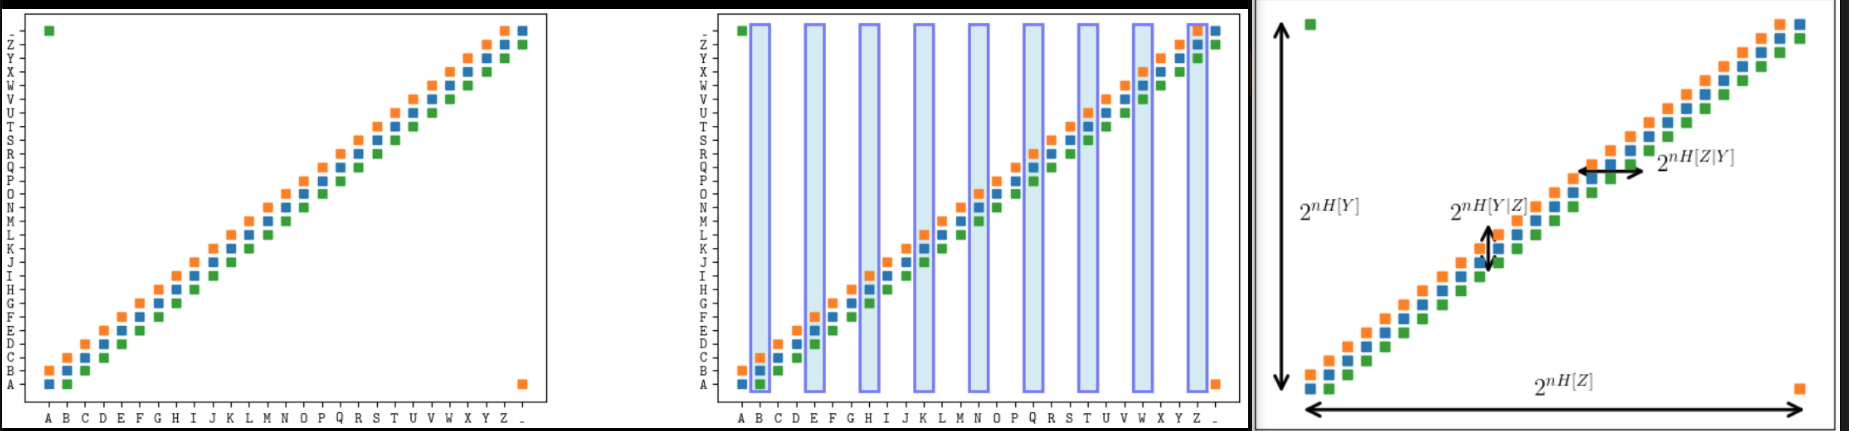

In [5]:
display(Image("./images/INF_noisy_typewriter.png", width=1100))

---

---

## 4.X SUMMARY of the NOISY CHANNELS PROBLEM

In this chapter, we saw that the noisy channel problem can be interpreted as an **inference problem**, and thus addressed using concepts such as priors, posteriors, and estimators. This provides the general framework for reasoning about decoding under uncertainty.

To effectively handle noise, we then introduced **error-correcting codes**, a broad class of techniques designed to detect and correct errors introduced by the channel. Within this family, an important subclass is that of **block codes**, which encode fixed-length blocks of bits into longer blocks by adding redundancy.

We have seen two examples of block codes:  
- **Repetition codes**: the simplest form of block codes (e.g., 0 → 000, 1 → 111), characterized by high redundancy but low efficiency.  
- **Hamming codes**: more sophisticated block codes that add redundancy in a structured way, allowing single-bit error correction with minimal overhead.

Finally, we introduced the concept of **channel capacity**, which represents the maximum achievable transmission rate $R$ for which the probability of error $P_e$ can approach zero. The design of efficient coding schemes, such as the ones discussed above, aims to approach this fundamental limit established by Shannon’s theorem.

---

# TO BE CHECKED FROM HERE BELOW--------------------------------------------------


### Shannon's Channel Coding Theorem

For long block codes ($n \to \infty$), we can asymptotically find nearly **non-confusable codewords**. The theorem states:  

For any channel, there exists an $(nR, n)$ block code with rate $R$ whenever  

$$
R < C
$$

where $C$ is the **channel capacity**.

This result relies on the concept of **typical sequences**: as $n \to \infty$, sequences behave predictably and most sequences fall in the typical set. We can choose codewords from a subset $S$ of typical sequences with $|S| = 2^{nR}$, and if $R < C$, these codewords are essentially non-confusable, allowing reliable transmission at a rate $R \approx C$.

---

### Typical Set Argument (Sketch)

- Consider the $n$-fold use of the channel, mapping $A_Z^n \to A_Y^n$.  
- For large $n$, the transmitted sequence $z^{(n)}$ is with high probability in the **typical set**, with  
  $$
  -\log p(z^{(n)}) \approx n H[Z]
  $$  
  and roughly $2^{nH[Z]}$ typical sequences.  
- Similarly, the received sequence $y^{(n)}$ is in its typical set with  
  $$
  -\log p(y^{(n)}) \approx n H[Y]
  $$  
  giving roughly $2^{nH[Y]}$ sequences.  
- Jointly typical pairs $(z^{(n)}, y^{(n)})$ satisfy  
  $$
  -\log p(z^{(n)}, y^{(n)}) \approx n H[Z,Y]
  $$  
  with about $2^{nH[Z,Y]}$ pairs.  
- For a given $z^{(n)}$, the number of likely outputs $y^{(n)}$ is roughly  
  $$
  2^{n H[Y|Z]} = \frac{2^{nH[Z,Y]}}{2^{nH[Z]}}
  $$  
- If we choose $2^{nR}$ codewords $z^{(n)} \in S$, they are non-confusable only if  
  $$
  2^{nR} \cdot 2^{nH[Y|Z]} \le 2^{nH[Y]} \quad \Rightarrow \quad R \le H[Y] - H[Y|Z] = I[Y:Z] \le C
  $$  
- Using **random coding** and **typical set decoding**, we can construct codes achieving rates arbitrarily close to $C$.

In practice, for large $n$, we can encode with negligible error and achieve $R \approx C$.


### Shannon's Channel Coding Theorem

The Shannon channel coding theorem provides a fundamental limit for reliable communication over a noisy channel. Its main idea is:

For long block codes ($n \to \infty$), we can construct sets of **nearly non-confusable codewords**. Specifically, for any channel, there exists an $(nR, n)$ block code that allows transmission at rate $R$ as long as

$$
R < C
$$

where $C$ is the **channel capacity**. This means we can send information with arbitrarily low error probability, provided we respect this rate limit.

The theorem relies on the concept of **typical sequences**. As $n$ becomes large:

- Most sequences behave predictably and belong to the **typical set**.  
- We can choose our codewords from a subset $S$ of typical sequences with $|S| = 2^{nR}$.  
- If $R < C$, these codewords are essentially **non-confusable**, so the receiver can reliably distinguish them even in the presence of noise.

---

### Typical Set Argument (Practical Interpretation)

- Consider using the channel $n$ times in a row, mapping sequences $z^{(n)} \in A_Z^n$ to $y^{(n)} \in A_Y^n$.  
- For large $n$, a transmitted sequence $z^{(n)}$ is very likely in the **typical set**, with roughly $2^{nH[Z]}$ sequences.  
- The received sequence $y^{(n)}$ also falls into its typical set, with about $2^{nH[Y]}$ sequences.  
- Jointly typical pairs $(z^{(n)}, y^{(n)})$ occur with probability concentrated on roughly $2^{nH[Z,Y]}$ pairs.  
- Given a transmitted sequence $z^{(n)}$, the number of likely received sequences $y^{(n)}$ is approximately

$$
2^{n H[Y|Z]} = \frac{2^{nH[Z,Y]}}{2^{nH[Z]}}
$$  

- If we select $2^{nR}$ codewords $z^{(n)}$ from the typical set, they remain **non-confusable** only if

$$
2^{nR} \cdot 2^{nH[Y|Z]} \le 2^{nH[Y]} \quad \Rightarrow \quad R \le H[Y] - H[Y|Z] = I[Z:Y] \le C
$$  

- By using **random coding** (choosing codewords randomly from the typical set) and **typical set decoding** (choosing the codeword that forms a jointly typical pair with the received sequence), we can approach the channel capacity $C$.

In practice, this means that with sufficiently long block codes, we can transmit at a rate $R \approx C$ while keeping the error probability negligible. Typical set decoding gives a **concrete procedure** for deciding which codeword was sent, based on the observed received sequence.


If the transmission rate $R$ is below $C$, reliable communication is theoretically possible. If $R > C$, errors are unavoidable.

# DA LEGGERE PARAGRAFO:
5.3